In [1]:
# view PE coeff

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tables
import h5py
from scipy.spatial.distance import pdist, squareform
import os

In [3]:
import os
import tables
print(os.getcwd())
def findfile(radius):
    filename = '../coeff_pe/5kt_' + radius + '.h5'
    #print(filename)
    h = tables.open_file(filename,'r')
    coeff = np.array(h.root.coeff)[:]
    expect = np.array(h.root.mean)[:]
    predict = np.array(h.root.predict)[:]
    h.close()
    return coeff, expect, predict
coeff = [];
expect = [];
predict = [];
for i in np.arange(12,-12.2,-0.2):
    file_str = '%+.2f' % i
    a1,a2,a3 = findfile(file_str)
    coeff.append(a1)
    expect.append(a2)
    predict.append(a3)
pe_coeff = np.array(coeff)
radius = np.arange(12,-12.2,-0.2)
plt.plot(radius, pe_coeff)
plt.xlabel('Radius/m')
plt.ylabel('Coefficients')

plt.legend(range(5))
plt.show()

/home/douwei/Recon1t/calib/Note


OSError: ``../coeff_pe/5kt_+12.00.h5`` does not exist

In [1]:
k1 = np.zeros((np.size(pe_coeff[0]),7))
radius = np.arange(12,-12.2,-0.2)
for i in np.arange(np.size(pe_coeff[0])):
    data = np.nan_to_num(pe_coeff[:,i])
    x = radius/12.2
    plt.plot(x, data)
    '''
    a = np.polyfit(x, data, 8)
    print(a)
    b = np.poly1d(a)
    c = b(x)
    plt.plot(x,c)'''
    index = (x<0.9) & (x>-0.9) & (x!=0)
    c = np.polynomial.legendre.legfit(x[index], data[index], 6)
    k1[i,:] = c
    plt.plot(x, np.polynomial.legendre.legval(x,c))

    plt.xlabel('Radius/m')
    plt.ylabel('Coefficients')
    plt.title(str(i)+'-th Legendre coeff')
    plt.legend(['raw','fit'])
    plt.show()
with h5py.File('../PE_coeff.h5','w') as out:
    out.create_dataset('coeff', data = k1)

NameError: name 'np' is not defined

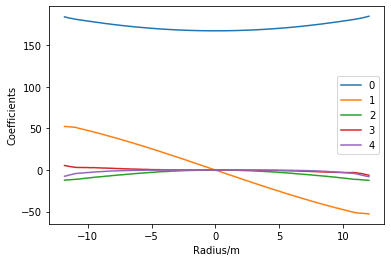

In [6]:
def findfile(radius):
    filename = '../coeff_time/5kt_' + radius + '.h5'
    #print(filename)
    h = tables.open_file(filename,'r')
    coeff = np.array(h.root.coeff)[:]
    h.close()
    return coeff
coeff = [];
for i in np.arange(12,-12,-0.2):
    file_str = '%+.2f' % i
    coeff.append(findfile(file_str))

time_coeff = np.array(coeff)
radius = np.arange(12,-12,-0.2)
plt.plot(radius, time_coeff)
plt.xlabel('Radius/m')
plt.ylabel('Coefficients')
plt.legend(range(5))
plt.show()

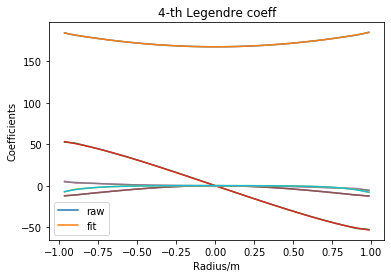

In [7]:
import h5py
k1 = np.zeros((5,7))
radius = np.arange(12,-12,-0.2)
for i in np.arange(np.size(time_coeff[0])):
    data = np.nan_to_num(time_coeff[:,i])
    x = radius/12.2
    plt.plot(x, data)
    '''
    a = np.polyfit(x, data, 8)
    print(a)
    b = np.poly1d(a)
    c = b(x)
    plt.plot(x,c)'''
    c = np.polynomial.legendre.legfit(x, data, 6)
    k1[i,:] = c
    plt.plot(x, np.polynomial.legendre.legval(x,c))

    plt.xlabel('Radius/m')
    plt.ylabel('Coefficients')
    plt.title(str(i)+'-th Legendre coeff')
    plt.legend(['raw','fit'])
with h5py.File('../Time_coeff.h5','w') as out:
    out.create_dataset('coeff', data = k1)

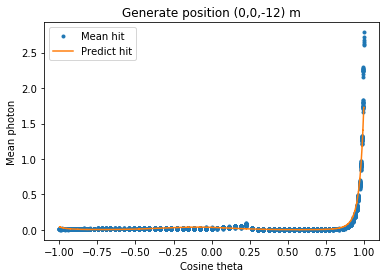

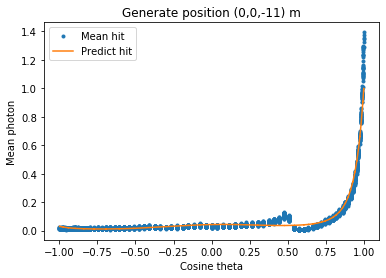

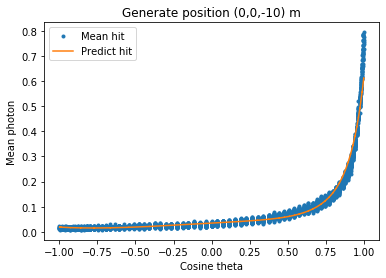

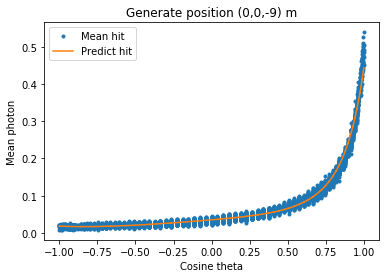

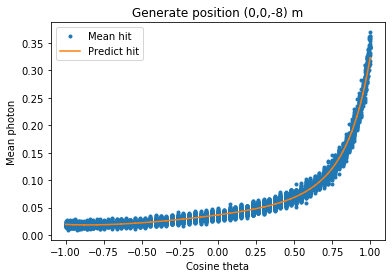

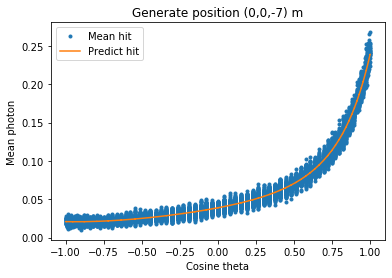

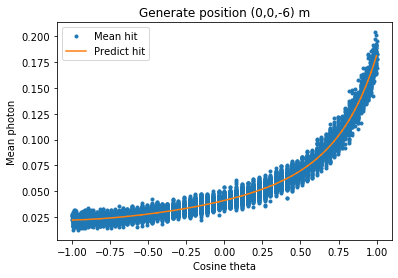

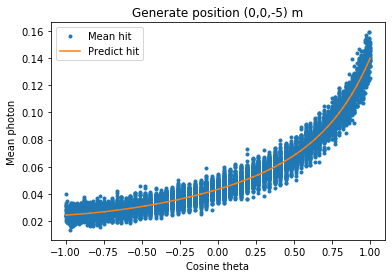

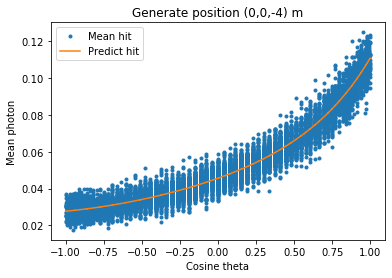

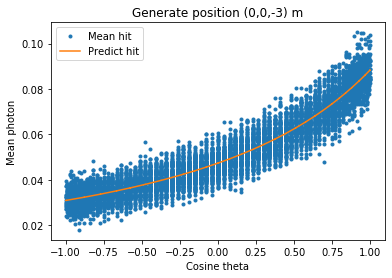

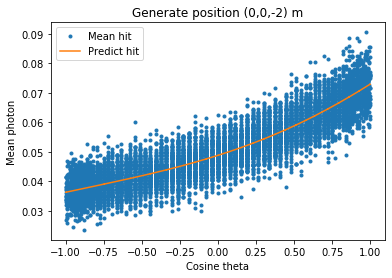

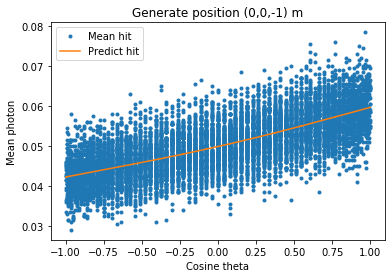

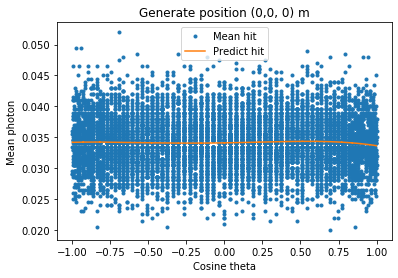

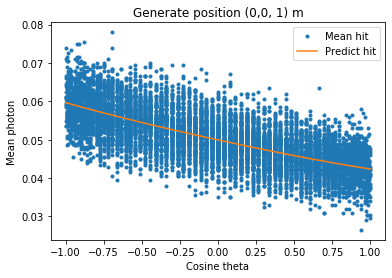

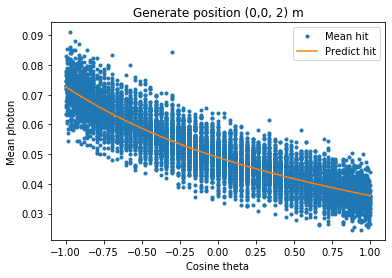

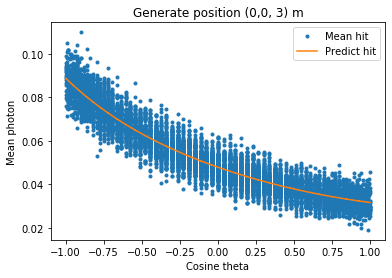

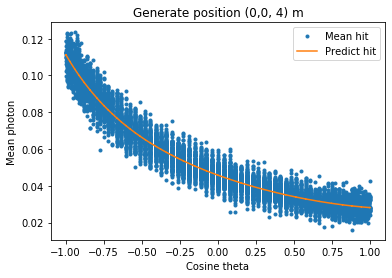

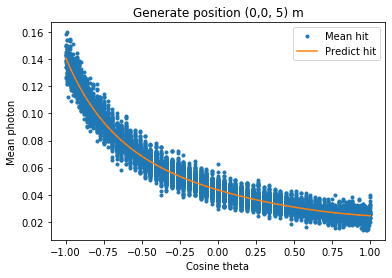

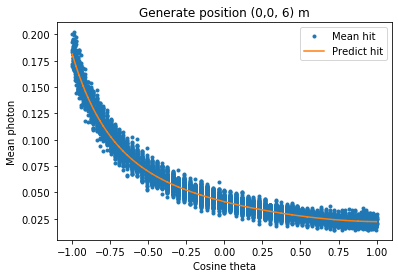

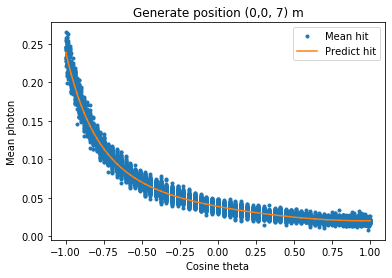

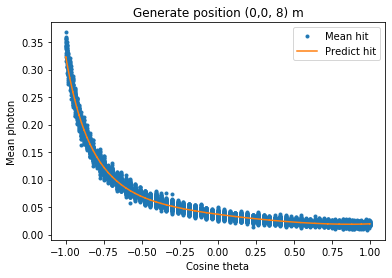

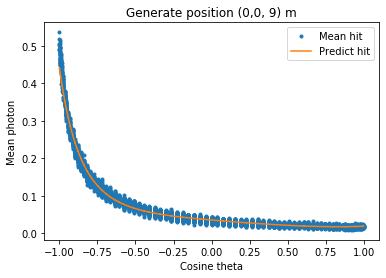

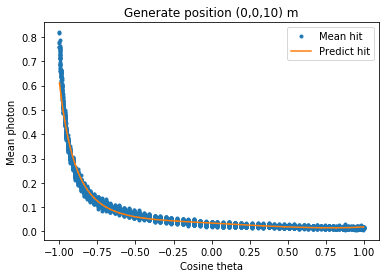

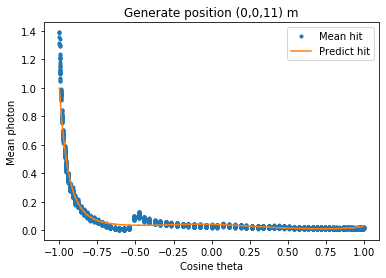

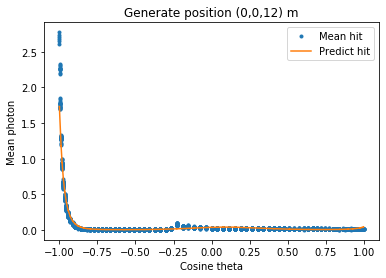

In [9]:
# view fit pe goodness

def ReadPMT(geo):
    f = open(r'../PMT_' + geo + '.txt')
    line = f.readline()
    data_list = []
    while line:
        num = list(map(float,line.split()))
        data_list.append(num)
        line = f.readline()
    f.close()
    PMT_pos = np.array(data_list)
    PMT_pos = PMT_pos[:,1:4]
    return PMT_pos
PMT_pos = ReadPMT('5kt')
vertex = np.array([0,0,10])
cos_theta = np.sum(vertex*PMT_pos,axis=1)\
    /np.sqrt(np.sum(vertex**2)*np.sum(PMT_pos**2,axis=1))
for i in np.arange(0,121,5):
    plt.plot(cos_theta, expect[i],'.')
    plt.plot(cos_theta, predict[i])
    plt.xlabel('Cosine theta')
    plt.ylabel('Mean photon')
    plt.title('Generate position (0,0,%2.f) m' % (i*0.2-12))
    plt.legend(['Mean hit','Predict hit'])
    plt.show()

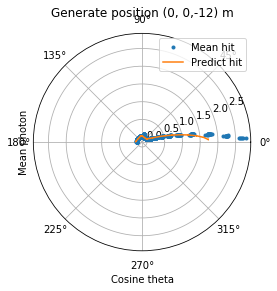

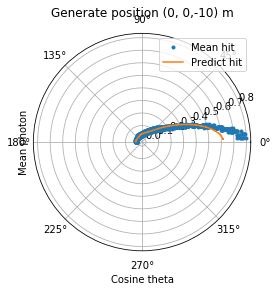

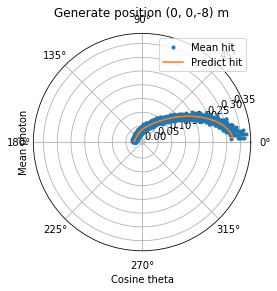

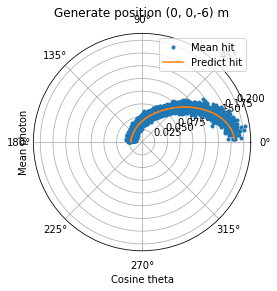

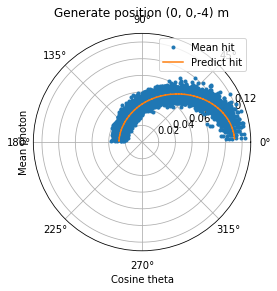

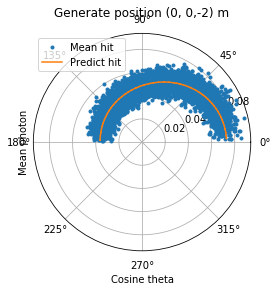

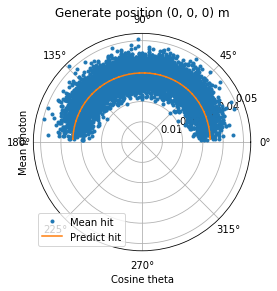

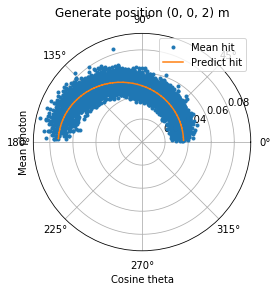

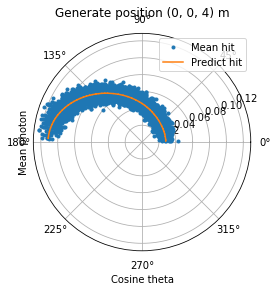

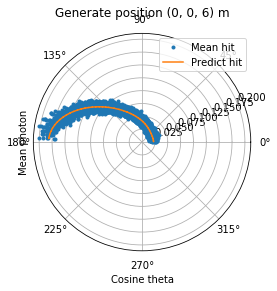

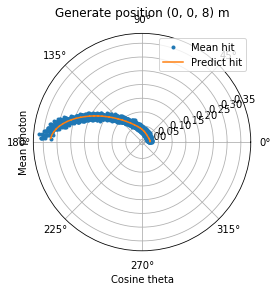

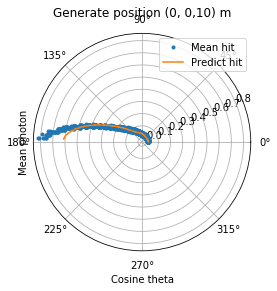

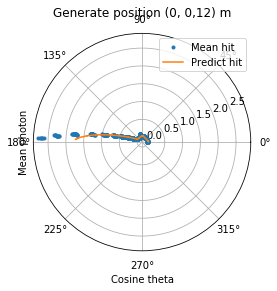

In [40]:
for i in np.arange(0,121,10):
    fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
    ax.plot(np.arccos(cos_theta), expect[i],'.')
    ax.plot(np.arccos(cos_theta), predict[i])
    plt.xlabel('Cosine theta')
    plt.ylabel('Mean photon')
    plt.title('Generate position (0, 0,%2.f) m' % (i*0.2-12))
    plt.legend(['Mean hit','Predict hit'])
    plt.show()

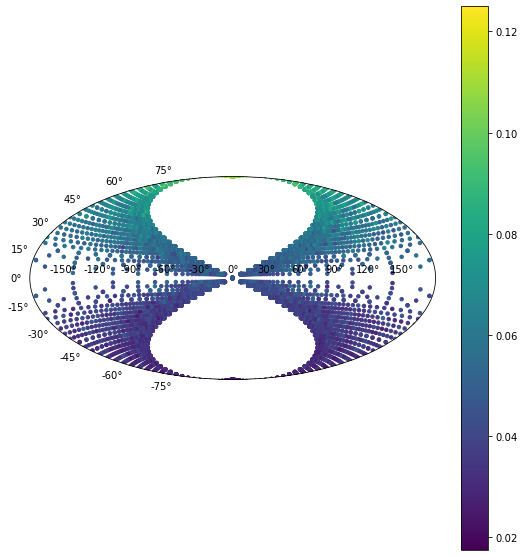

In [75]:
vertex = np.array([0,0,10])
cos_theta = np.sum(vertex*PMT_pos,axis=1)\
    /np.sqrt(np.sum(vertex**2)*np.sum(PMT_pos**2,axis=1))
phi = np.arctan(PMT_pos[:,2]/(PMT_pos[:,1]+1e-3))
plt.figure(figsize=(20,10))
plt.subplot(1,2,1,projection="aitoff")
plt.scatter(np.transpose(phi)*np.pi,cos_theta*np.pi/2,s=12, c=expect[40])
plt.colorbar()

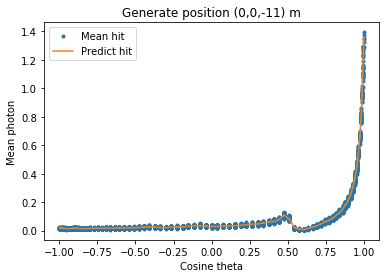

In [16]:
i=5
plt.plot(cos_theta, expect[i],'.')
plt.plot(cos_theta, predict[i])
plt.xlabel('Cosine theta')
plt.ylabel('Mean photon')
plt.title('Generate position (0,0,%2.f) m' % (i*0.2-12))
plt.legend(['Mean hit','Predict hit'])
plt.show()

Text(0, 0.5, 'abs coeff')

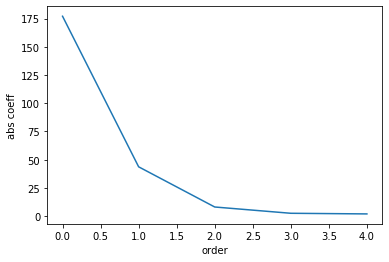

In [10]:
# legendre spectrum
plt.plot(np.abs(coeff[15]))
plt.xlabel('order')
plt.ylabel('abs coeff')

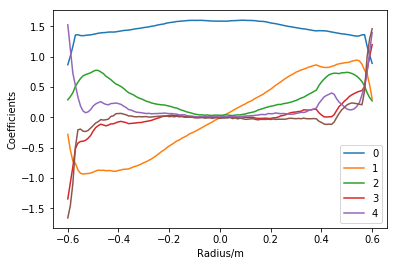

In [4]:
import os
import tables
def findfile(radius):
    filename = '../coeff_pe_1t_2.0MeV/file_' + radius + '.h5'
    #print(filename)
    h = tables.open_file(filename,'r')
    coeff = np.array(h.root.coeff)[:]
    #expect = np.array(h.root.mean)[:]
    #predict = np.array(h.root.predict)[:]
    h.close()
    #return coeff, expect, predict
    return coeff
coeff = [];
expect = [];
predict = [];
radius = np.arange(0.6001,-0.60,-0.01)
for i in radius:
    file_str = '%+.2f' % i
    #a1,a2,a3 = findfile(file_str)
    a1 = findfile(file_str)
    coeff.append(a1)
    #expect.append(a2)
    #predict.append(a3)
pe_coeff = np.array(coeff)
plt.plot(radius, pe_coeff)
plt.xlabel('Radius/m')
plt.ylabel('Coefficients')

plt.legend(range(5))
plt.show()

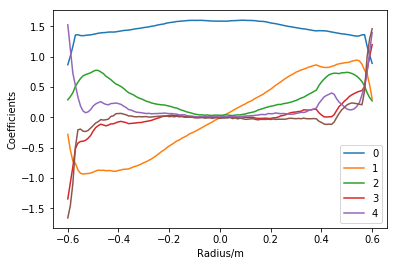

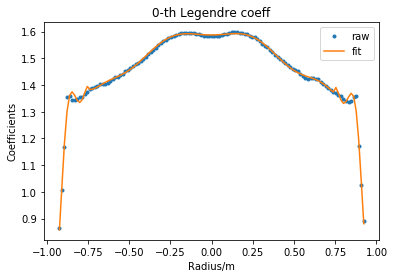

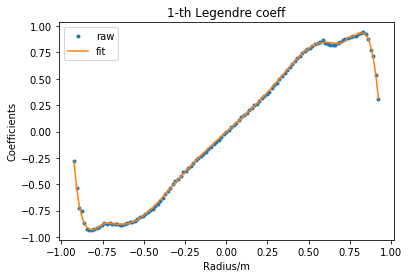

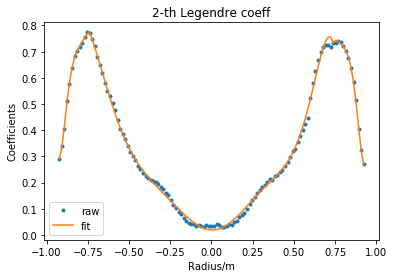

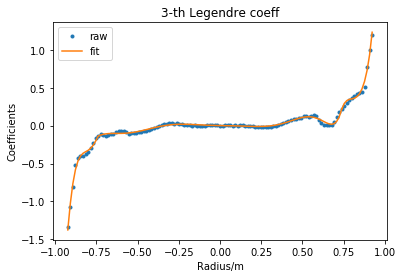

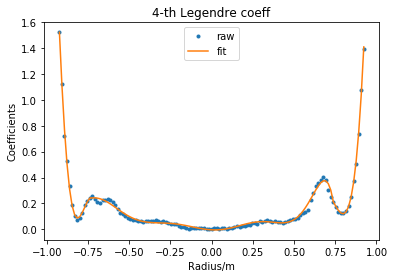

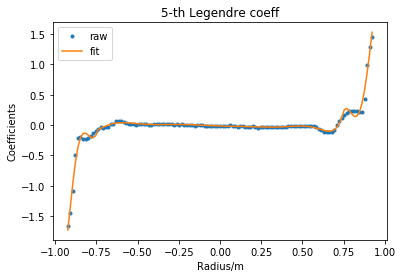

In [5]:
import os
import tables
def findfile(radius):
    filename = '../coeff_pe_1t_2.0MeV/file_' + radius + '.h5'
    #print(filename)
    h = tables.open_file(filename,'r')
    coeff = np.array(h.root.coeff)[:]
    h.close()
    return coeff
coeff = [];
expect = [];
predict = [];
radius = np.arange(0.6001,-0.60,-0.01)
for i in radius:
    file_str = '%+.2f' % i
    #a1,a2,a3 = findfile(file_str)
    a1 = findfile(file_str)
    coeff.append(a1)
    #expect.append(a2)
    #predict.append(a3)
pe_coeff = np.array(coeff)
plt.plot(radius, pe_coeff)
plt.xlabel('Radius/m')
plt.ylabel('Coefficients')

plt.legend(range(5))
plt.show()

N_max = 10
bd = 0.75
k1 = np.zeros((np.size(pe_coeff[0]),N_max+1))
k2 = np.zeros((np.size(pe_coeff[0]),N_max+1))
radius = np.arange(0.6001,-0.60,-0.01)
for i in np.arange(np.size(pe_coeff[0])):
    data = np.nan_to_num(pe_coeff[:,i])
    x = radius/0.65
    plt.plot(x, data,'.')
    '''
    a = np.polyfit(x, data, 8)
    print(a)
    b = np.poly1d(a)
    c = b(x)
    plt.plot(x,c)'''
    index1 = (x<=bd+1e-3) & (x>=-bd-1e-3) & (x!=0)
    weight = np.zeros_like(x[index1]) + 1e-3
    weight[0] = 0.1
    weight[-1] = 0.1
    c1 = np.polynomial.legendre.legfit(x[index1], data[index1], N_max, w=weight)
    k1[i,:] = c1
    
    index2 = (x>=bd-2e-2) | (x<=-bd+2e-2)
    weight = np.zeros_like(x[index2]) + 1e-3
    weight[np.int(np.size(weight)/2-1)] = 0.1
    weight[np.int(np.size(weight)/2)] = 0.1
    c2 = np.polynomial.legendre.legfit(x[index2], data[index2], N_max,w=weight)
    k2[i,:] = c2
    
    x_total = np.hstack((x[index1],x[index2]))
    y_total = np.hstack((np.polynomial.legendre.legval(x[index1],c1),np.polynomial.legendre.legval(x[index2],c2)))
    index = np.argsort(x_total)
    
    plt.plot(x_total[index],y_total[index])
    
    plt.xlabel('Radius/m')
    plt.ylabel('Coefficients')
    plt.title(str(i)+'-th Legendre coeff')
    plt.legend(['raw','fit'])
    plt.show()
with h5py.File('../PE_coeff_1t.h5','w') as out:
    out.create_dataset('coeff1', data = k1)
    out.create_dataset('coeff2', data = k2)

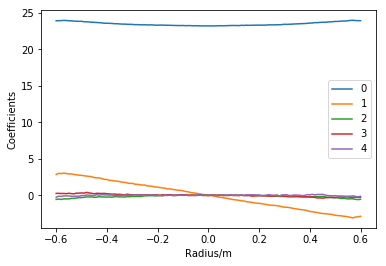

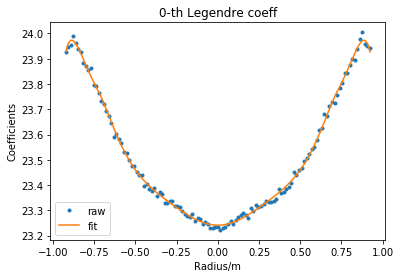

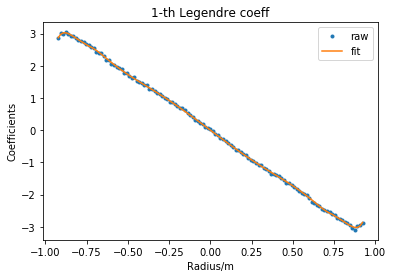

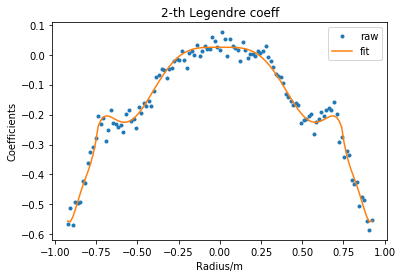

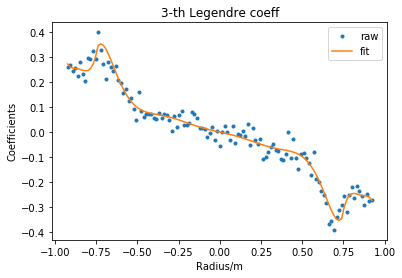

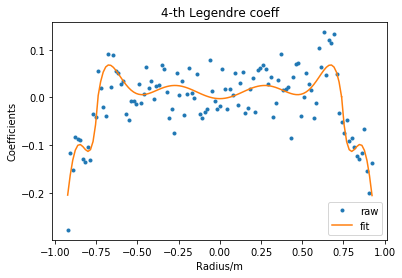

In [21]:
import os
import tables
from scipy.optimize import curve_fit
def findfile(radius):
    filename = '../coeff_time_1t_2.0MeV/file_' + radius + '.h5'
    #print(filename)
    h = tables.open_file(filename,'r')
    coeff = np.array(h.root.coeff)[:]
    h.close()
    return coeff

def odd_func(x, a, b, c, d, e):
    return a * x**1 + b * x**3 + c * x**5 + d * x**7 + e * x**9

def even_func(x, a, b, c, d, e):
    return a * x**0 + b * x**2 + c * x**4 + d * x**6 + e * x**8

coeff = [];
expect = [];
predict = [];
radius = np.arange(0.6001,-0.60,-0.01)
for i in radius:
    file_str = '%+.2f' % i
    #a1,a2,a3 = findfile(file_str)
    a1 = findfile(file_str)
    coeff.append(a1)
    #expect.append(a2)
    #predict.append(a3)
time_coeff = np.array(coeff)
plt.plot(radius, time_coeff)
plt.xlabel('Radius/m')
plt.ylabel('Coefficients')

plt.legend(range(5))
plt.show()

N_max = 10
bd = 0.75
k1 = np.zeros((np.size(time_coeff[0]),N_max+1))
k2 = np.zeros((np.size(time_coeff[0]),N_max+1))
radius = np.arange(0.6001,-0.60,-0.01)
for i in np.arange(np.size(time_coeff[0])):
    data = np.nan_to_num(time_coeff[:,i])
    x = radius/0.65
    plt.plot(x, data,'.')
    '''
    a = np.polyfit(x, data, 8)
    print(a)
    b = np.poly1d(a)
    c = b(x)
    plt.plot(x,c)'''
    index1 = (x<=bd+1e-3) & (x>=-bd-1e-3) & (x!=0)
    
    weight = np.zeros_like(x[index1]) + 1e-3
    weight[0] = 0.1
    weight[-1] = 0.1
    #c1 = np.polynomial.legendre.legfit(x[index1], data[index1], N_max, w=weight)
    
    x_end = x[index1][-1]
    x_start = x[index1][0]
    data_end = data[index1][-1]
    data_start = data[index1][0]
    #print(np.hstack((x[index1],x_end*np.ones(100),x_start*np.ones(100))))
    if(i%2==1):
        popt1, pcov = curve_fit(odd_func, np.hstack((x[index1],x_end*np.ones(100),x_start*np.ones(100))), \
                               np.hstack((data[index1],data_end*np.ones(100),data_start*np.ones(100))))
        output1 = odd_func(x[index1], *popt1)
        #plt.plot(x[index1], odd_func(x[index1], *popt), 'r-')
    else:
        popt1, pcov = curve_fit(even_func, np.hstack((x[index1],x_end*np.ones(100),x_start*np.ones(100))), \
                               np.hstack((data[index1],data_end*np.ones(100),data_start*np.ones(100))))
        #plt.plot(x[index1], even_func(x[index1], *popt), 'r-')
        output1 = even_func(x[index1], *popt1)
    #k1[i,:] = c1
    
    index2 = (x>=bd-2e-2) | (x<=-bd+2e-2)
    weight = np.zeros_like(x[index2]) + 1e-3
    weight[np.int(np.size(weight)/2-1)] = 0.1
    weight[np.int(np.size(weight)/2)] = 0.1
    #c2 = np.polynomial.legendre.legfit(x[index2], data[index2], N_max,w=weight)
    
    if(i%2==1):
        popt2, pcov = curve_fit(odd_func, np.hstack((x[index2],x_end*np.ones(100),x_start*np.ones(100))), \
                               np.hstack((data[index2],data_end*np.ones(100),data_start*np.ones(100))))
        #plt.plot(x[index2], odd_func(x[index2], *popt), 'r-')
        output2 = odd_func(x[index2], *popt2)
    else:
        popt2, pcov = curve_fit(even_func, np.hstack((x[index2],x_end*np.ones(100),x_start*np.ones(100))), \
                               np.hstack((data[index2],data_end*np.ones(100),data_start*np.ones(100))))
        output2 = even_func(x[index2], *popt2)
        #plt.plot(x[index2], even_func(x[index2], *popt), 'r-')
    #k2[i,:] = c2
    
    #x_total = np.hstack((x[index1],x[index2]))
    #y_total = np.hstack((np.polynomial.legendre.legval(x[index1],c1),np.polynomial.legendre.legval(x[index2],c2)))
    #index = np.argsort(x_total)
    x_total = np.hstack((x[index1],x[index2]))
    y_total = np.hstack((output1,output2))
    index = np.argsort(x_total)
    
    plt.plot(x_total[index],y_total[index])
    #plt.text(0,0.5,r'fit: z^1=%2.3f, z^3=%2.3f, z^5=%2.3f, z^7=%2.3f, z^9=%2.3f' % tuple(popt))
    plt.xlabel('Radius/m')
    plt.ylabel('Coefficients')
    plt.title(str(i)+'-th Legendre coeff')
    plt.legend(['raw','fit'])
    plt.show()
#with h5py.File('../Time_coeff_1t.h5','w') as out:
#    out.create_dataset('coeff1', data = k1)
#    out.create_dataset('coeff2', data = k2)
#print(x[index1])
#print(x[index2])

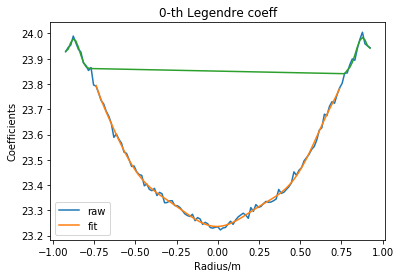

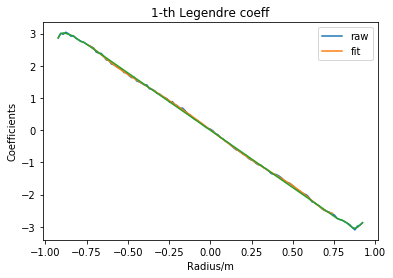

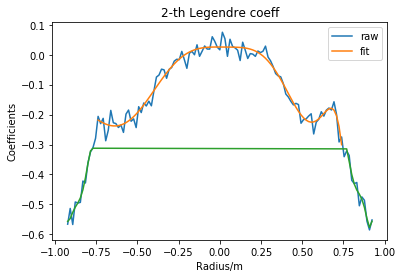

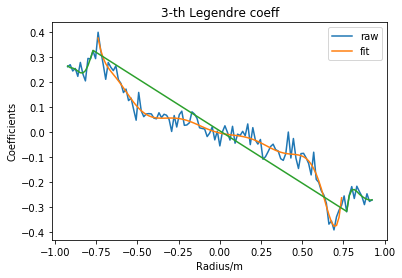

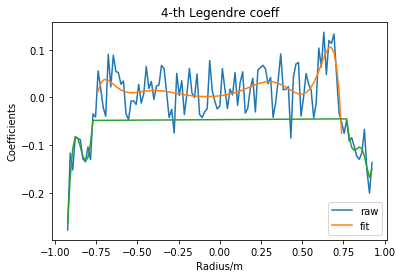

RuntimeError: Unable to create link (name already exists)

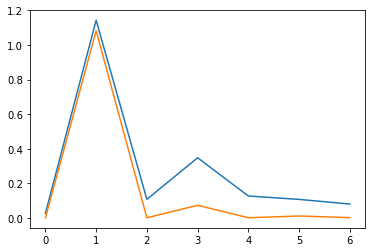

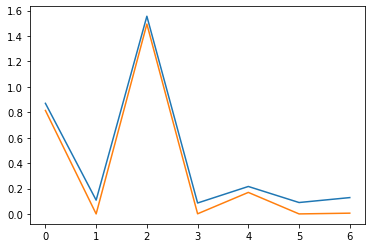

In [77]:
a = h5py.File('../Time_coeff_1t.h5','r')
c_1 = a['coeff'][:]
a.close()
a = h5py.File('../Time_coeff.h5','r')
c_2 = a['coeff'][:]
a.close()

i = 1
plt.plot(np.abs(c_1[i]))
plt.plot(np.abs(c_2[i]/14.4*0.8/3))
plt.show()
i = 2
plt.plot(np.abs(c_1[i]))
plt.plot(np.abs(c_2[i]/14.4*0.8*3))

In [79]:
np.polynomial.legendre.legval([1,1],1.2)

array([1.2, 1.2])

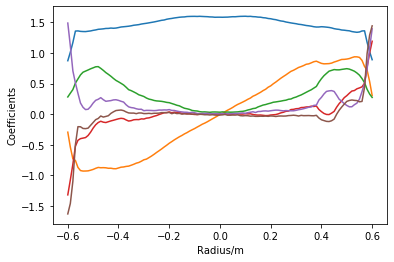

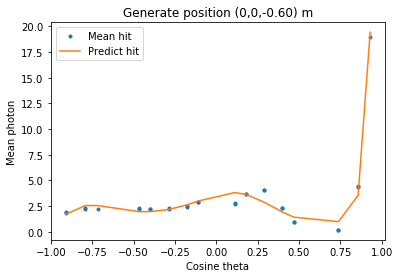

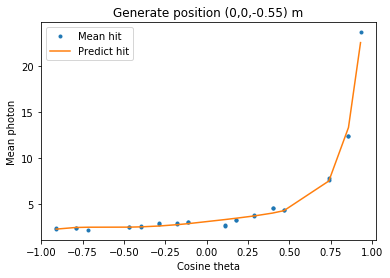

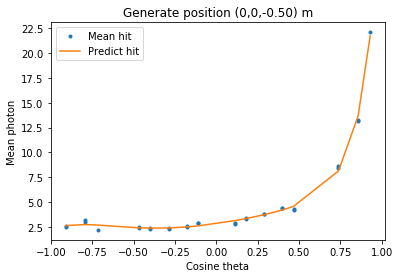

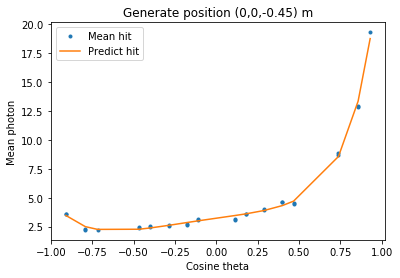

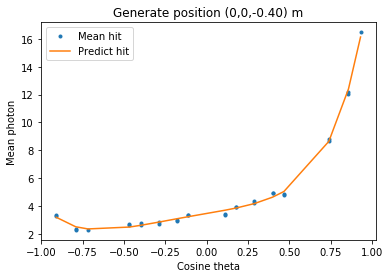

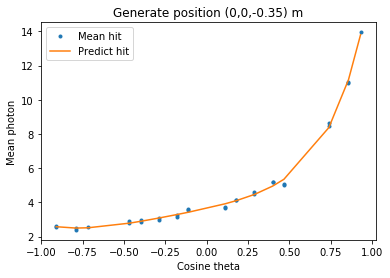

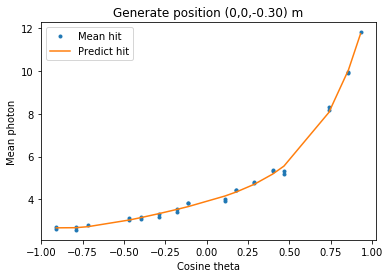

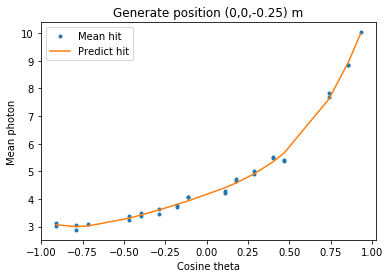

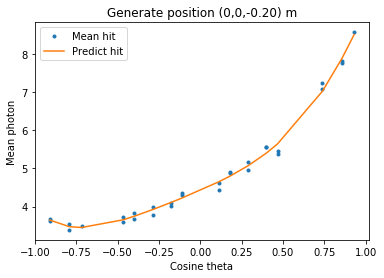

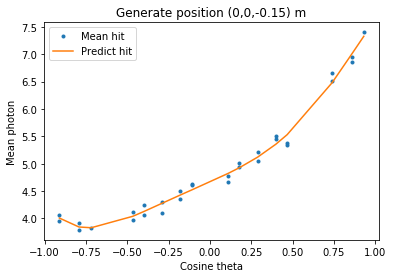

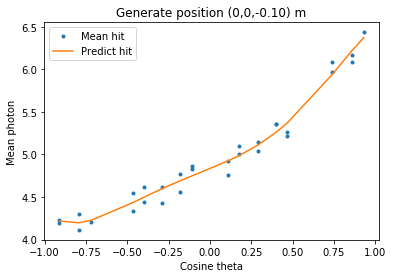

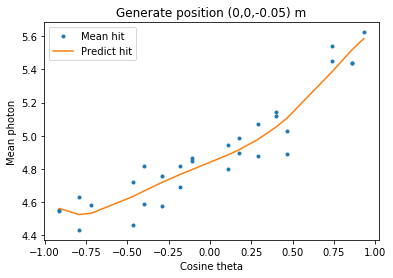

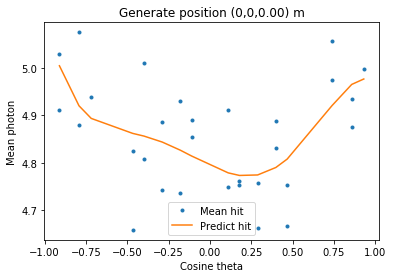

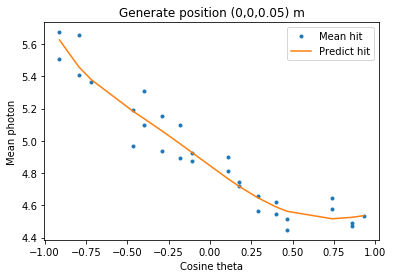

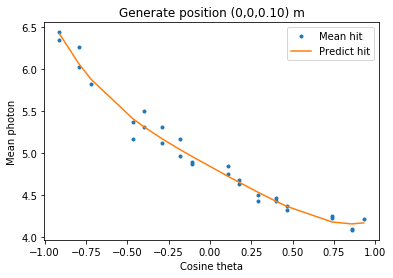

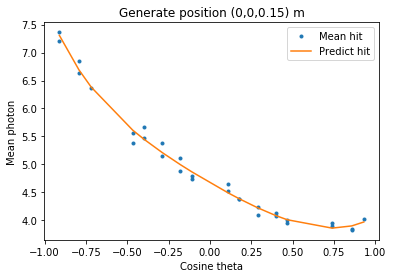

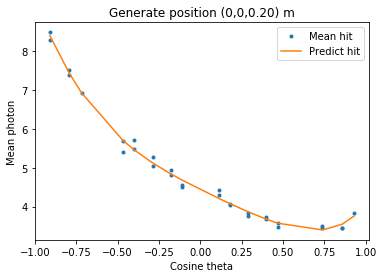

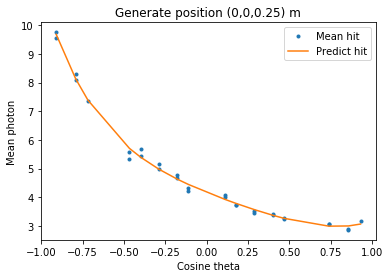

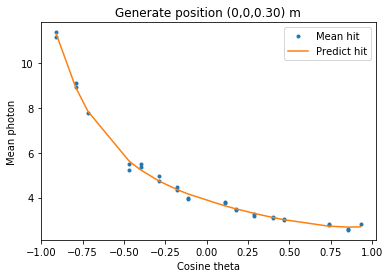

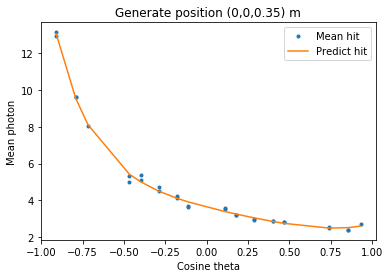

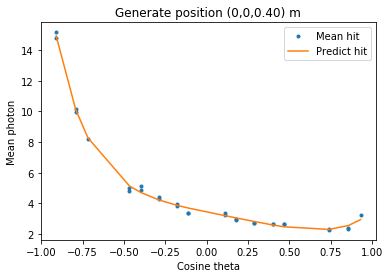

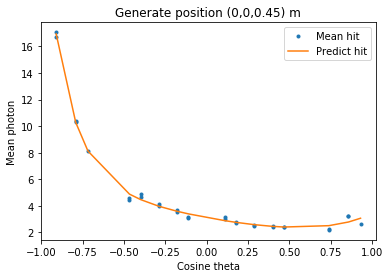

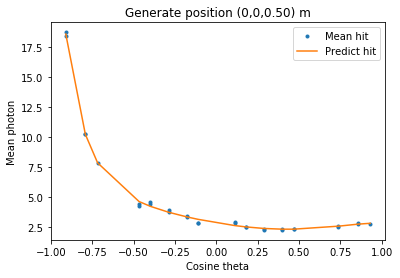

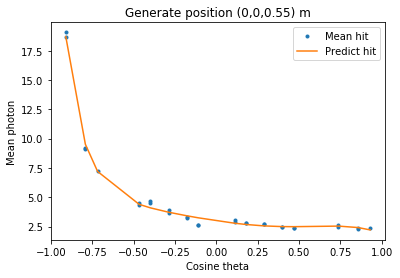

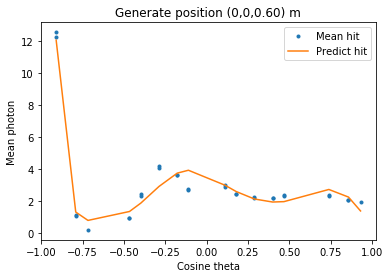

In [5]:
# view fit pe goodness
def findfile(radius):
    filename = '../coeff_pe_1t_sparse_exp_5/file_' + radius + '.h5'
    #print(filename)
    h = tables.open_file(filename,'r')
    coeff = np.array(h.root.coeff)[:]
    expect = np.array(h.root.mean)[:]
    predict = np.array(h.root.expect)[:]
    h.close()
    return coeff, expect, predict

coeff = [];
expect = [];
predict = [];

for i in np.arange(0.6001,-0.60,-0.01):
    file_str = '%+.2f' % i
    a1,a2,a3 = findfile(file_str)
    coeff.append(a1)
    expect.append(a2)
    predict.append(a3)

time_coeff = np.array(coeff)
radius = np.arange(0.6001,-0.60,-0.01)
plt.plot(radius, time_coeff)
plt.xlabel('Radius/m')
plt.ylabel('Coefficients')
plt.show()
def ReadPMT(geo):
    f = open(r'../PMT_' + geo + '.txt')
    line = f.readline()
    data_list = []
    while line:
        num = list(map(float,line.split()))
        data_list.append(num)
        line = f.readline()
    f.close()
    PMT_pos = np.array(data_list)
    PMT_pos = PMT_pos
    return PMT_pos

PMT_pos = ReadPMT('1t')
vertex = np.array([0,2,10])
cos_theta = np.sum(vertex*PMT_pos,axis=1)\
    /np.sqrt(np.sum(vertex**2)*np.sum(PMT_pos**2,axis=1))
predict = np.array(predict)
for i in np.arange(0,121,5):
    plt.plot(cos_theta, expect[i],'.')
    index = np.argsort(cos_theta)
    plt.plot(cos_theta[index], predict[i,index])
    plt.xlabel('Cosine theta')
    plt.ylabel('Mean photon')
    plt.title('Generate position (0,0,%.2f) m' % (i*0.01-0.6))
    plt.legend(['Mean hit','Predict hit'])
    plt.show()

Text(0, 0.5, 'abs coeff')

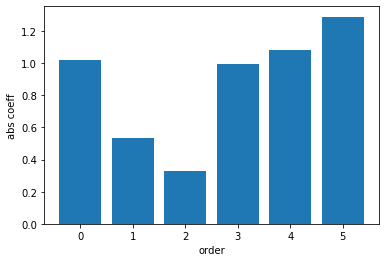

In [8]:
plt.bar(np.arange(0,6),np.abs(coeff[1]))
plt.xlabel('order')
plt.ylabel('abs coeff')

(array([11.,  9.,  8.,  6.,  5., 17., 11., 15., 15., 24.]),
 array([2.26631643, 2.57732167, 2.88832692, 3.19933216, 3.51033741,
        3.82134265, 4.1323479 , 4.44335314, 4.75435839, 5.06536363,
        5.37636888]),
 <a list of 10 Patch objects>)

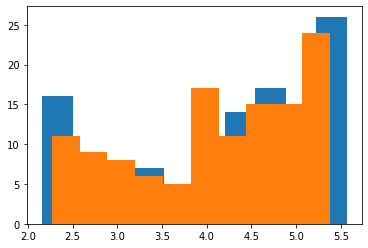

In [129]:
plt.hist(np.array(expect)[:,10])
plt.hist(np.array(expect)[:,5])

In [32]:
h = tables.open_file('/mnt/stage/douwei/Simulation/1t_root/1MeV_20000/1t_+0.00.h5','r')
hit = h.root.GroundTruth[:]['ChannelID']
event = h.root.GroundTruth[:]['EventID']
h.close()
pe = np.zeros((30,np.max(event)))
for i in np.arange(1,np.max(event)+1):
    for j in np.arange(30):
        pe[j,i-1] = sum(hit[event==i]==j)
    

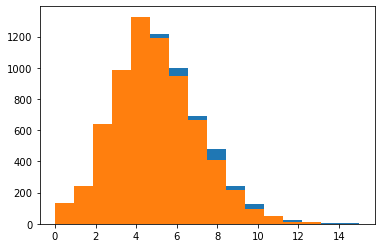

In [34]:
plt.hist(pe[1],bins=np.int(np.max(pe[1])-np.min(pe[1])+1))
plt.hist(pe[2],bins=np.int(np.max(pe[2])-np.min(pe[2])+1))
plt.show()

In [56]:
lambda1 = np.sum(pe,axis=1)/np.size(pe[1])

i1 = 0
i2 = 5
(lambda1[i2] - lambda1[i1])/np.sqrt(lambda1[i1]/np.size(pe[i1]) + lambda1[i2]/np.size(pe[i2]))

0.7102002175298524

In [54]:
lambda1

array([4.88945087, 4.95881503, 4.78236994, 4.86531792, 4.9267341 ,
       4.91618497, 5.00419075, 5.06127168, 4.94971098, 4.76632948,
       4.77369942, 4.76141618, 4.90072254, 4.77716763, 4.9132948 ,
       4.95635838, 4.94118497, 4.82008671, 4.70867052, 4.83598266,
       4.84913295, 4.66575145, 4.92528902, 5.07485549, 5.05823699,
       4.68150289, 4.73078035, 4.67283237, 4.73916185, 4.91445087])

In [47]:
np.size(pe[1]),np.size(pe[2])

(6920, 6920)

/opt/gentoo/usr/lib64/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide


[inf inf inf ... inf inf inf] inf


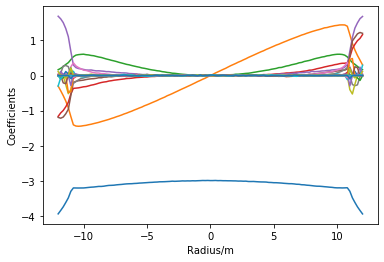

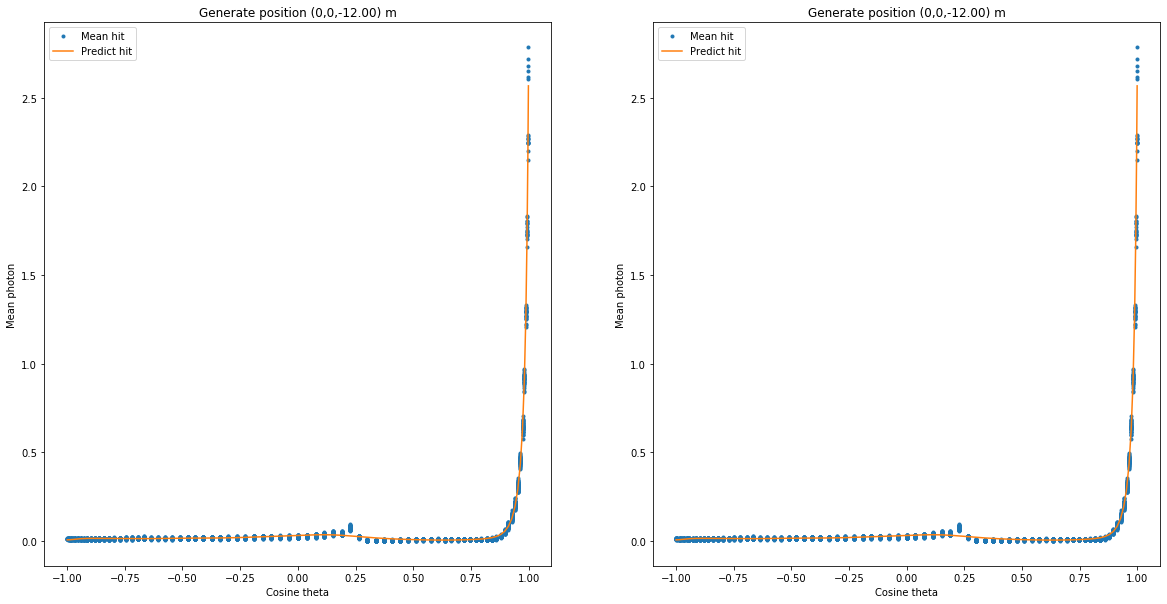

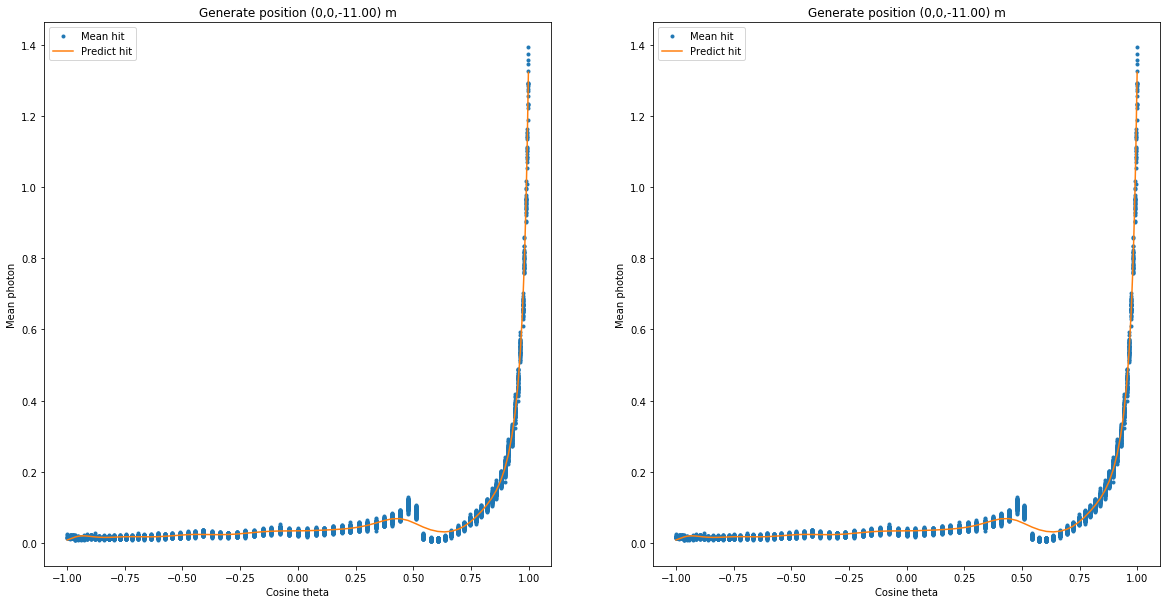

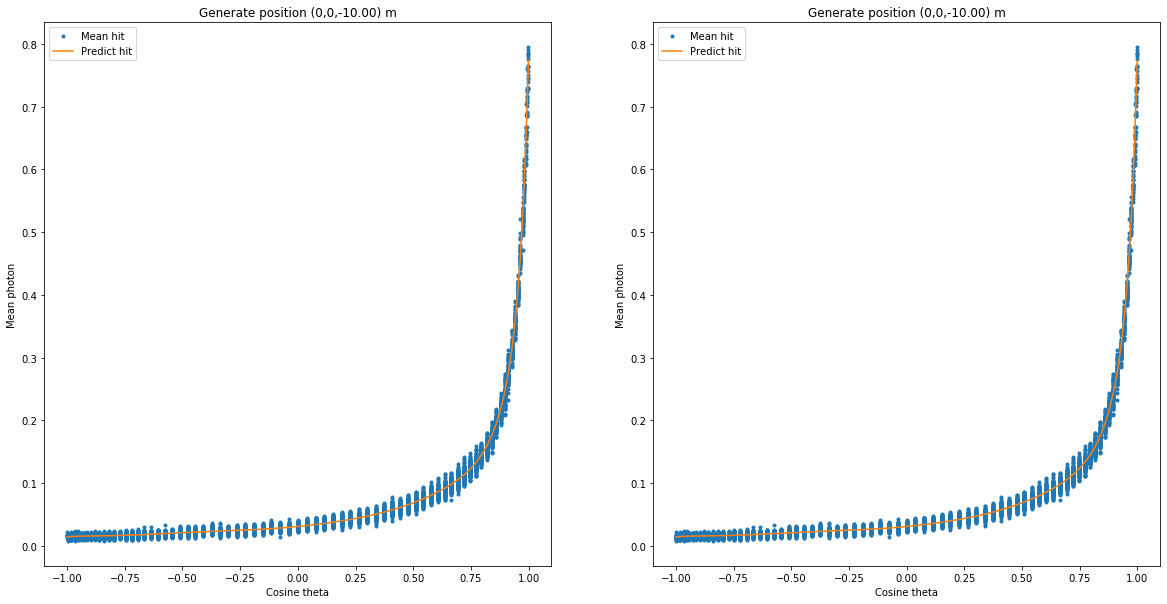

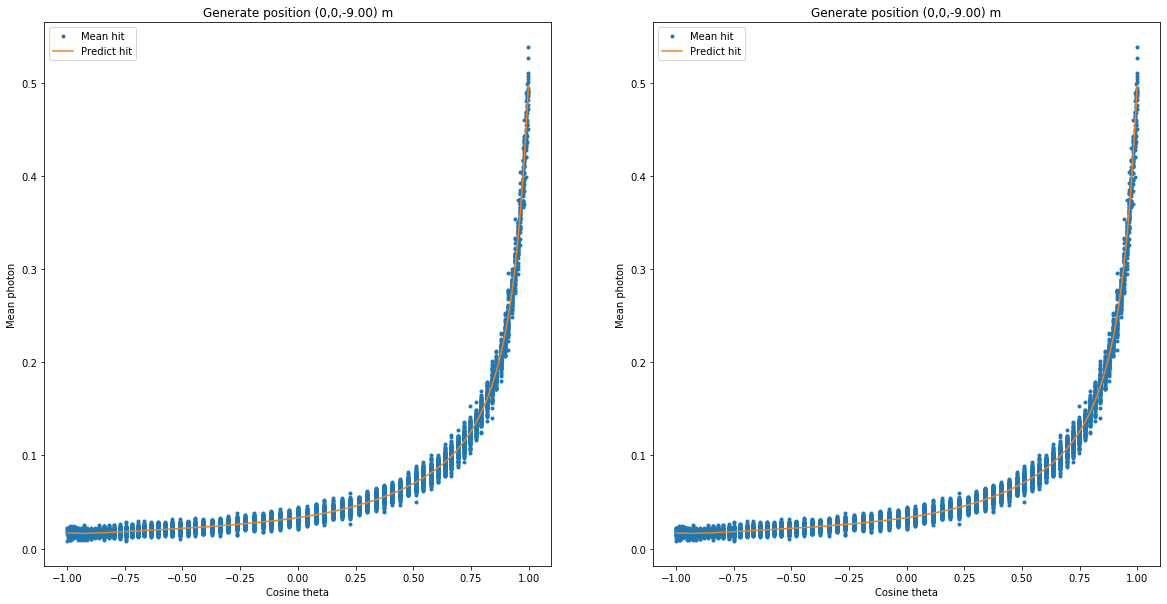

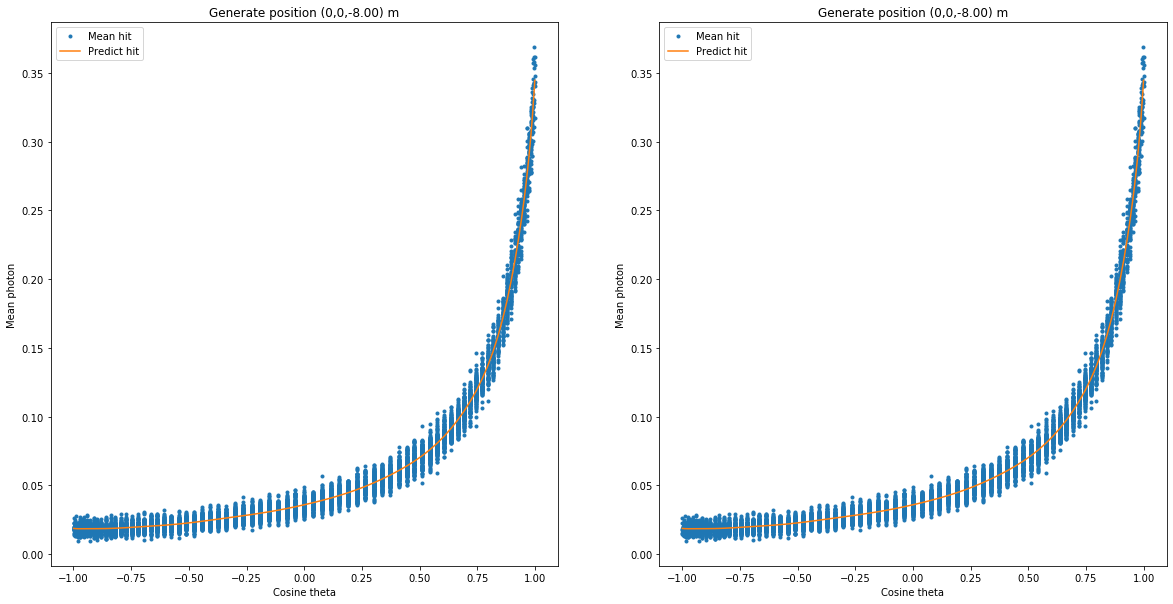

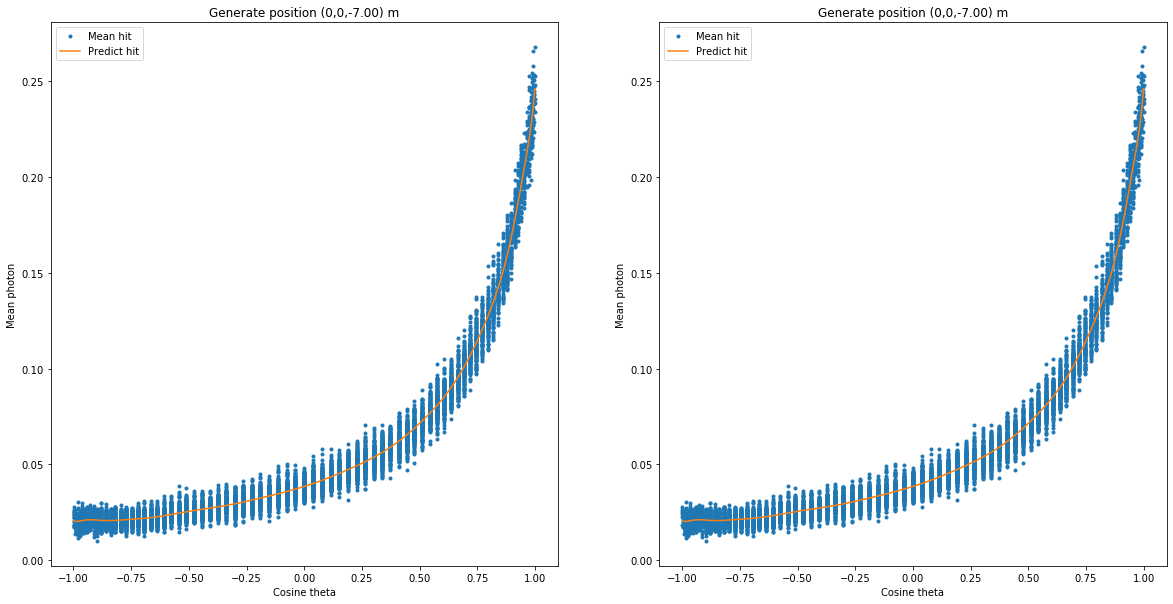

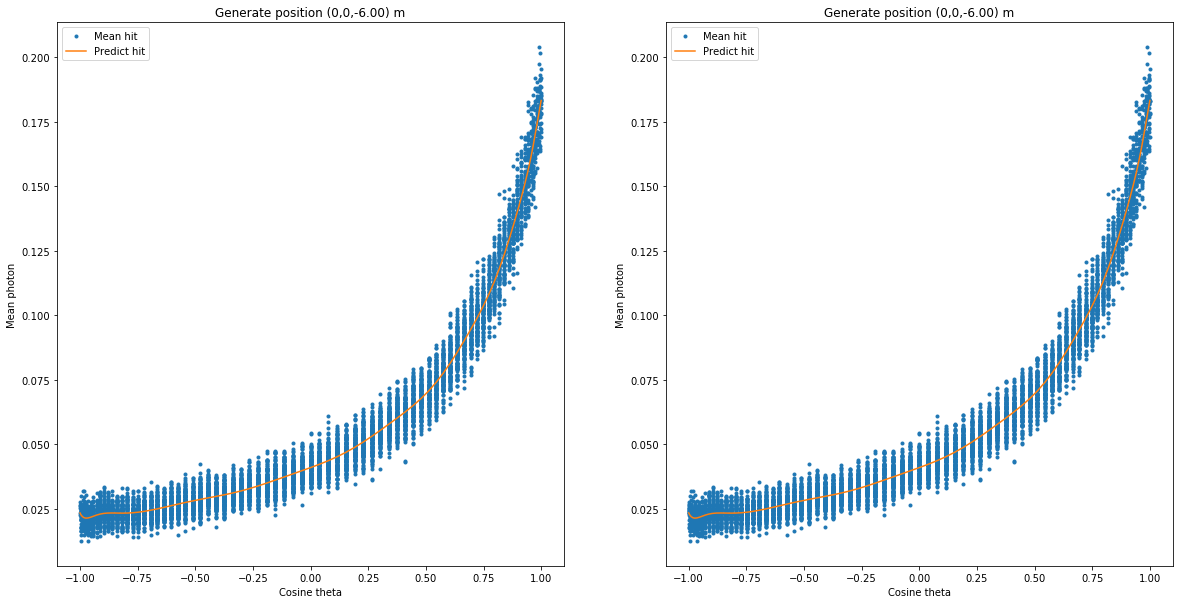

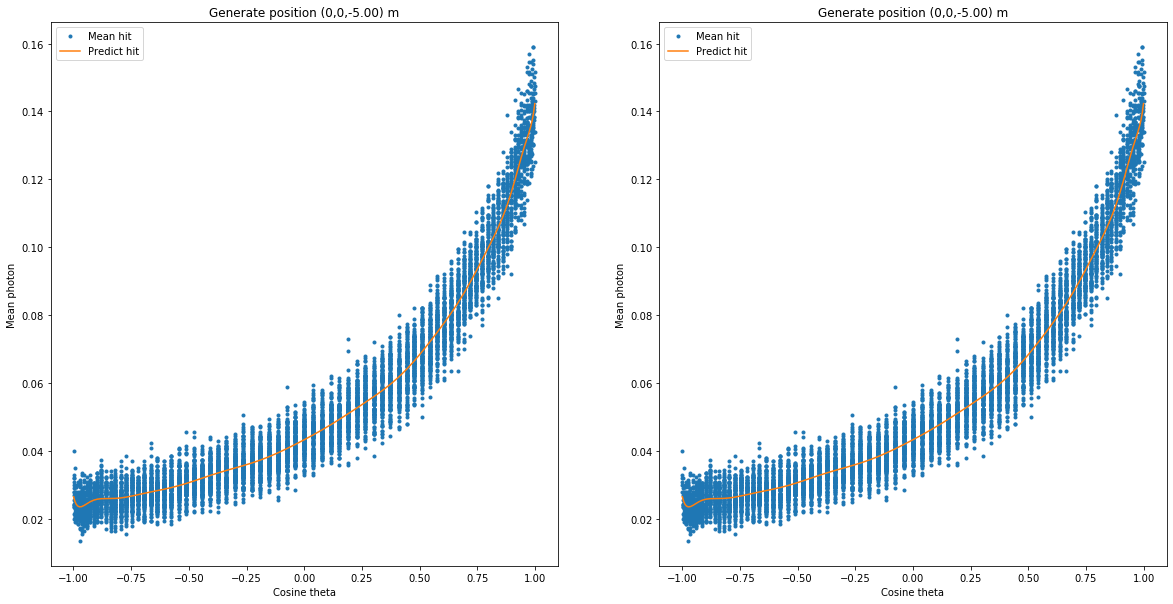

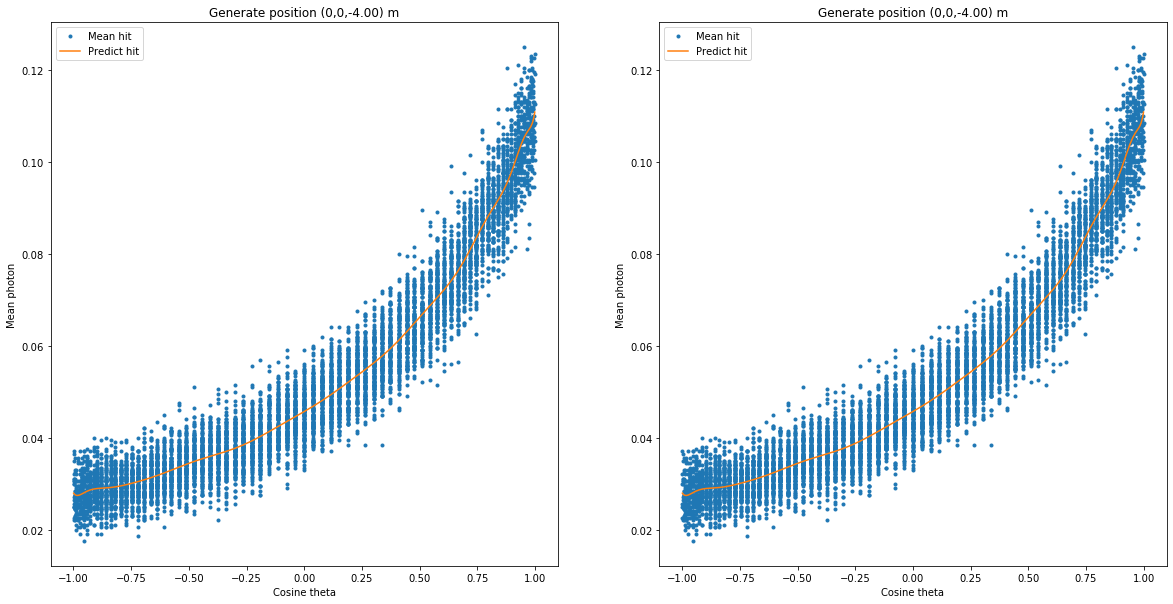

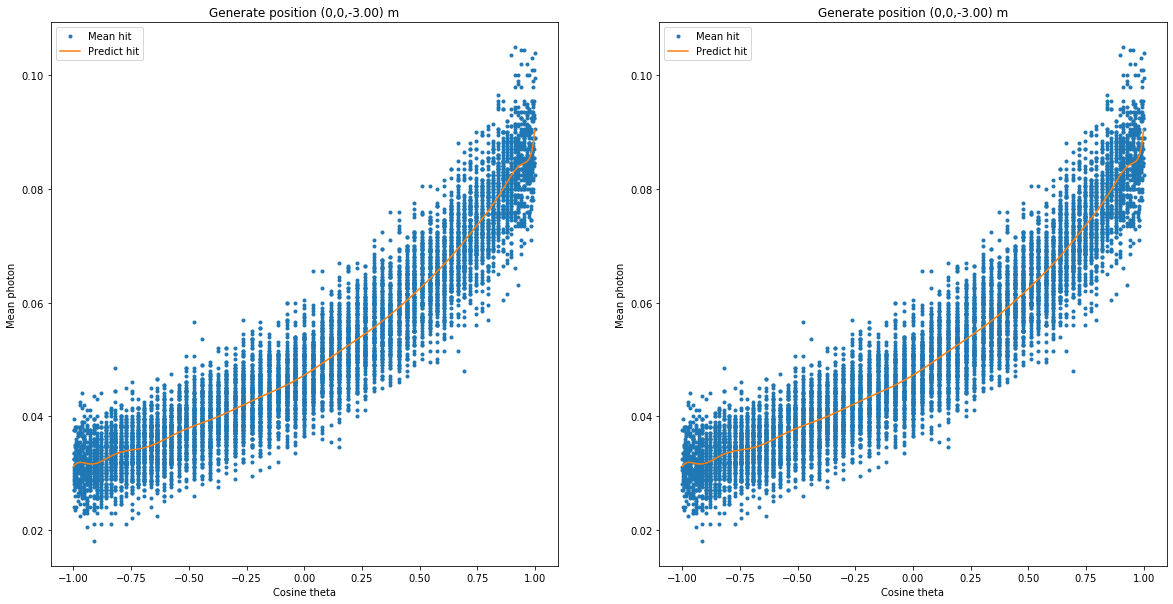

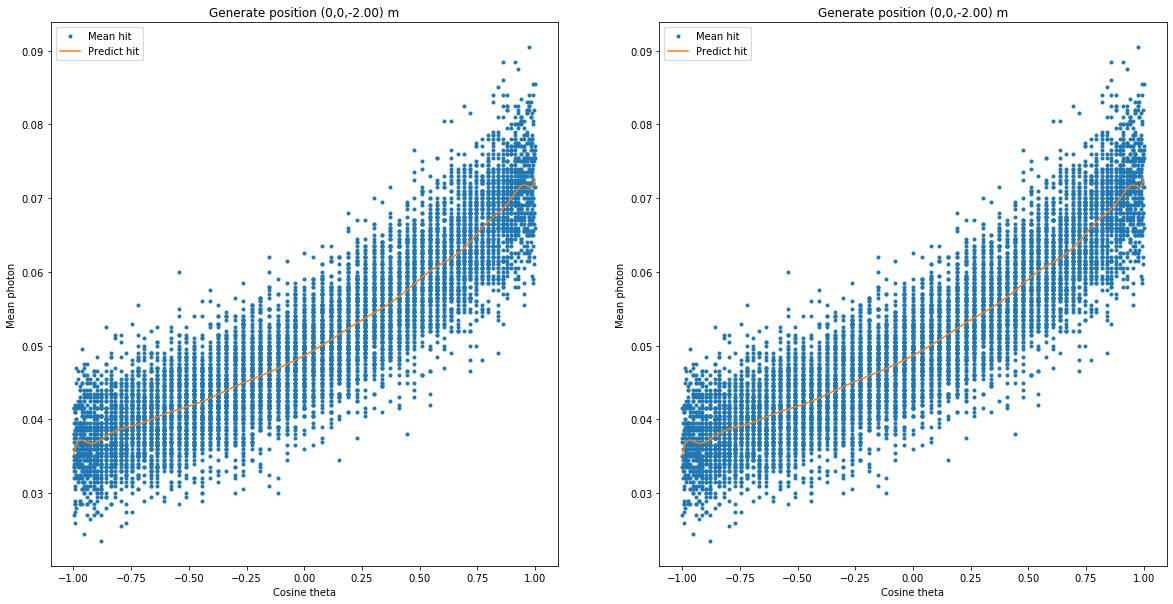

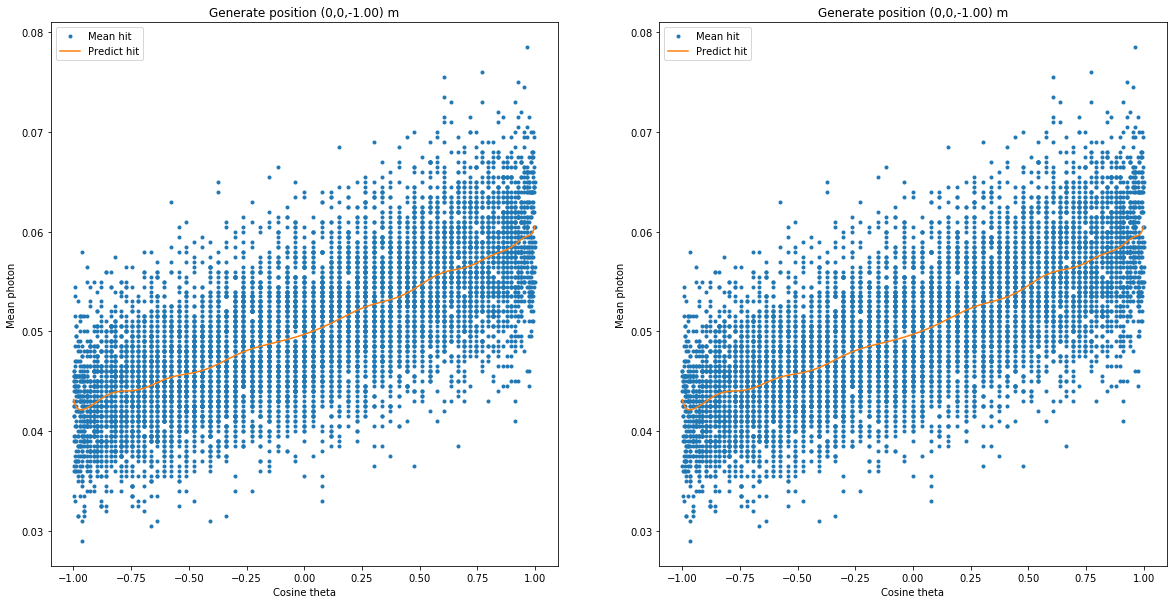

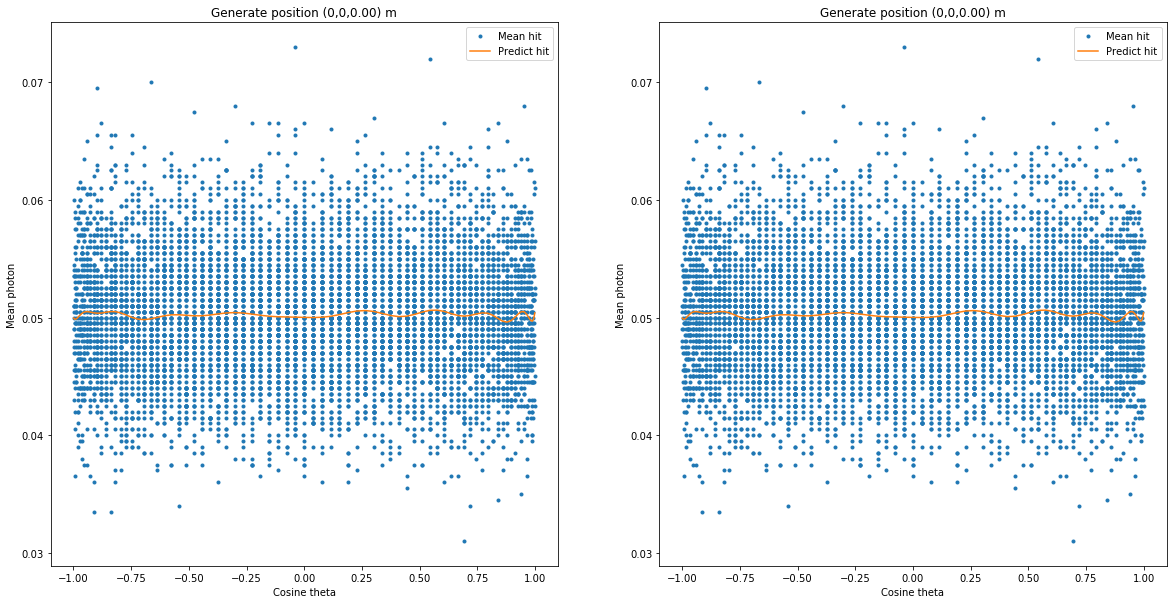

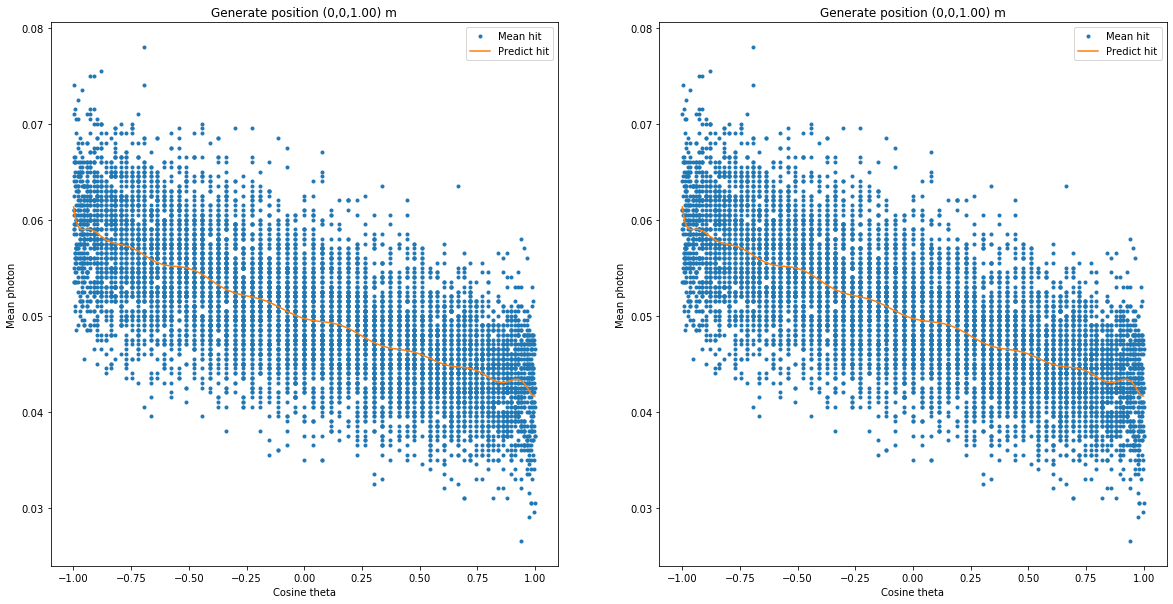

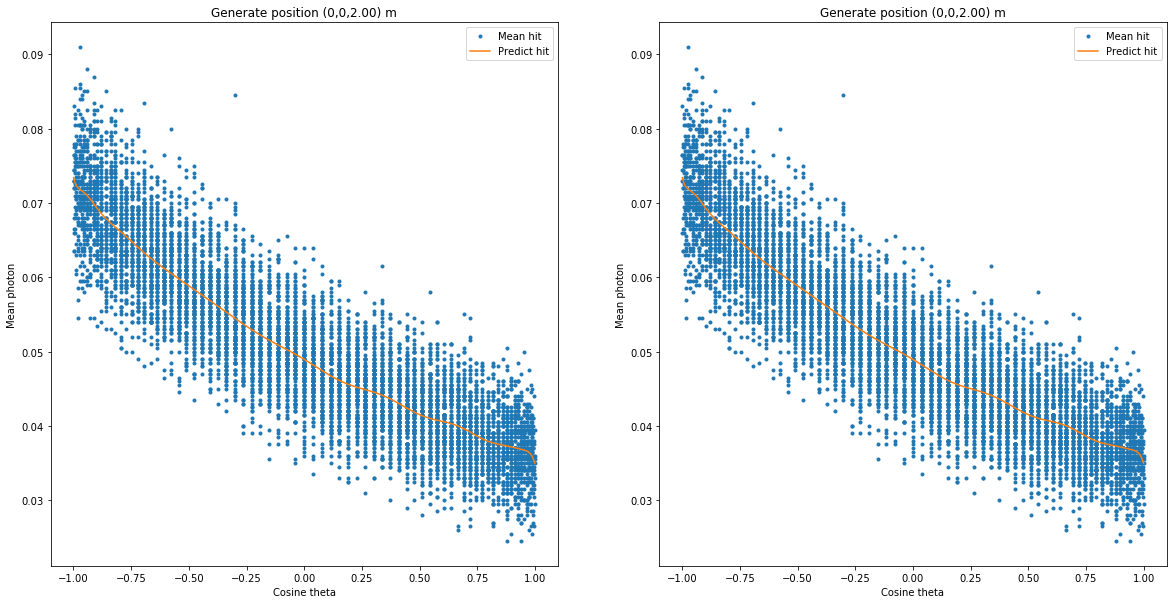

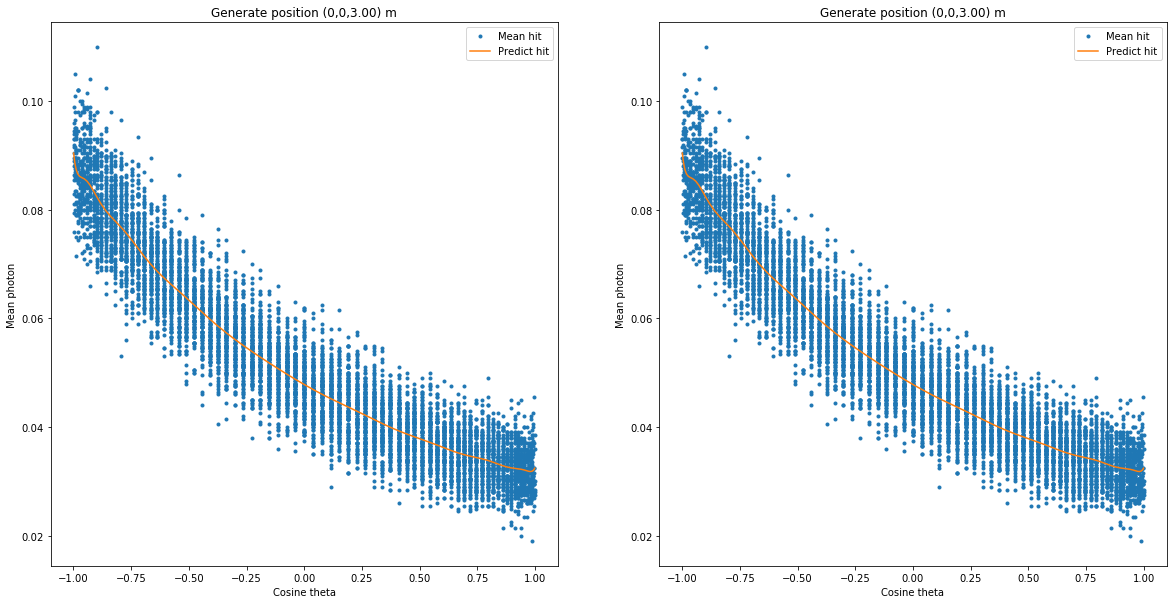

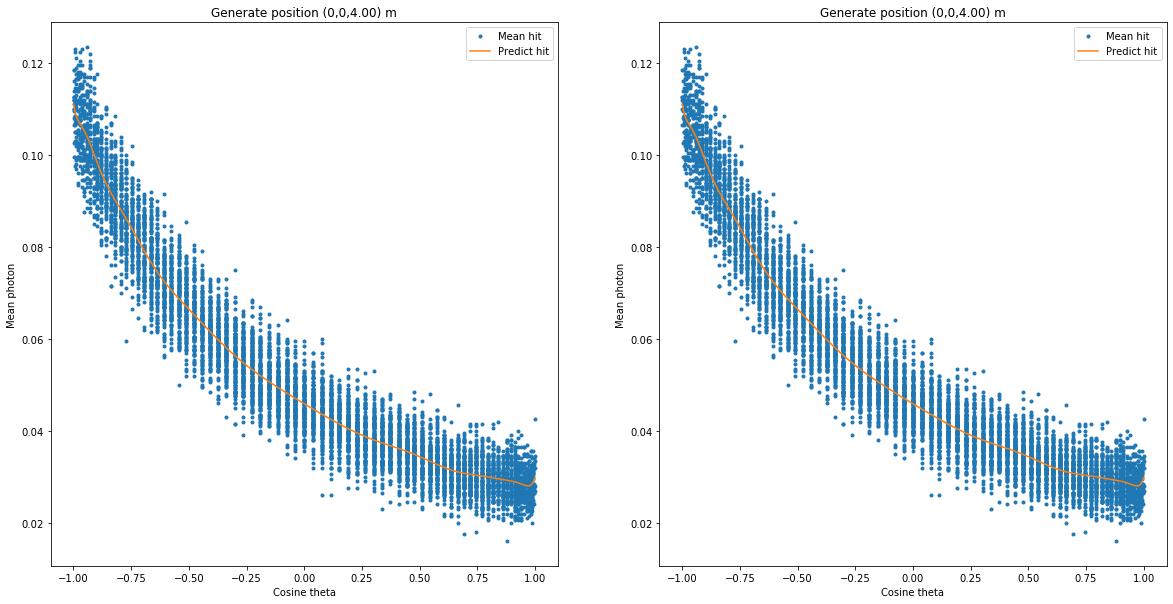

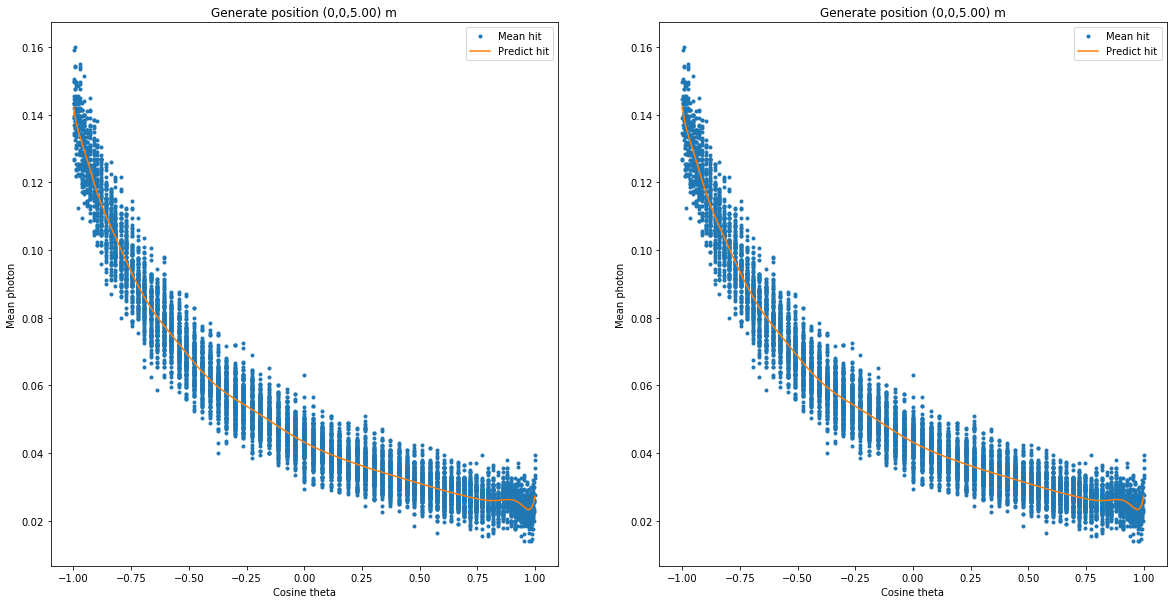

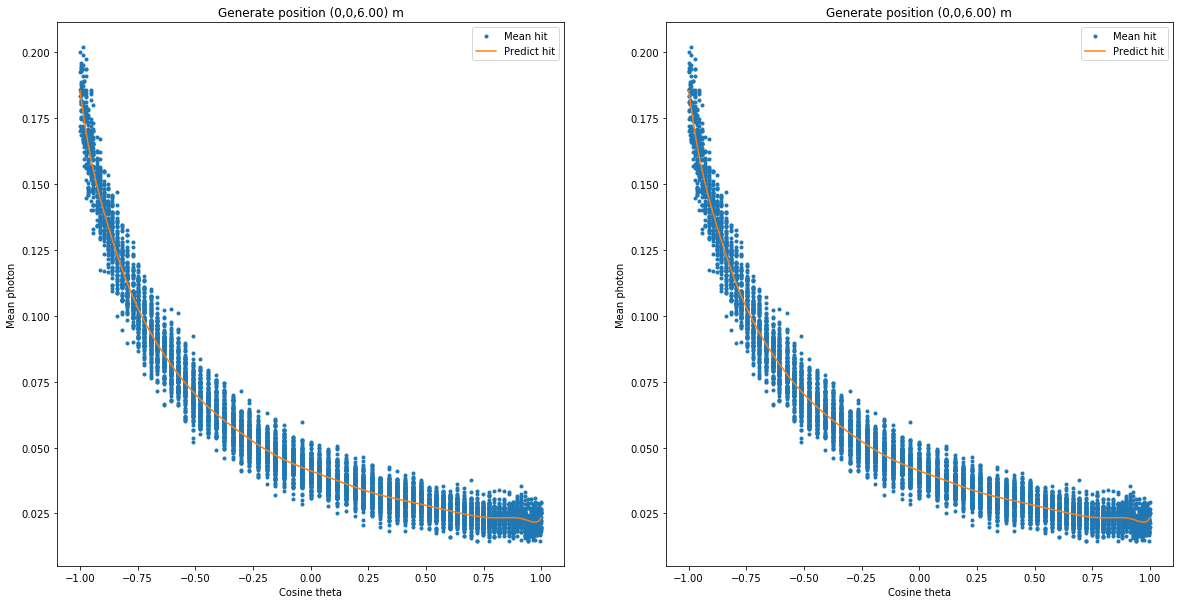

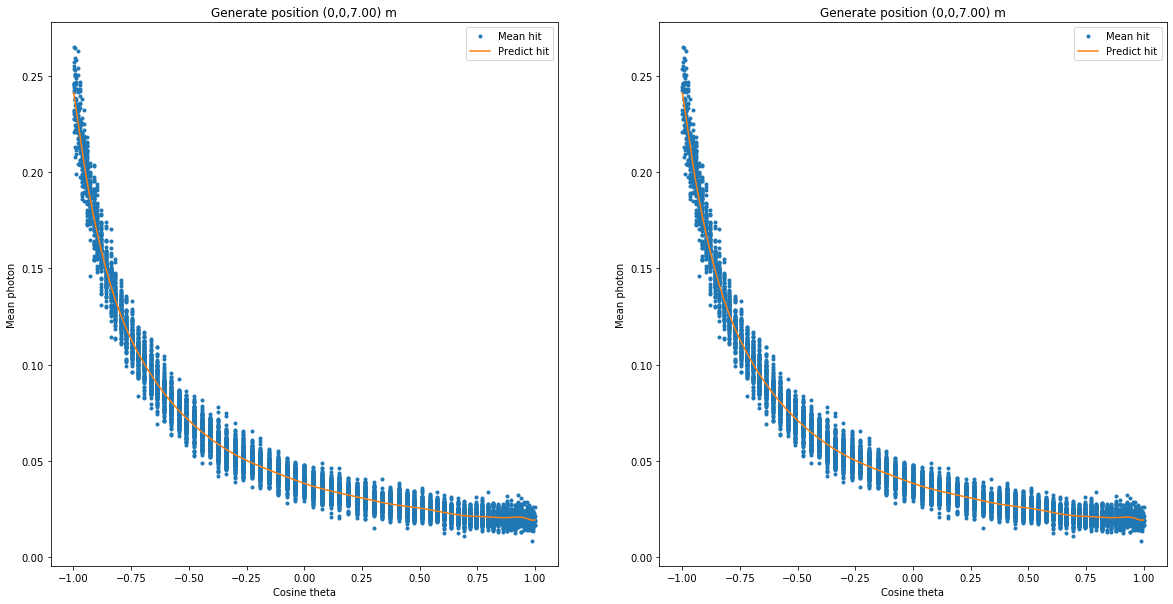

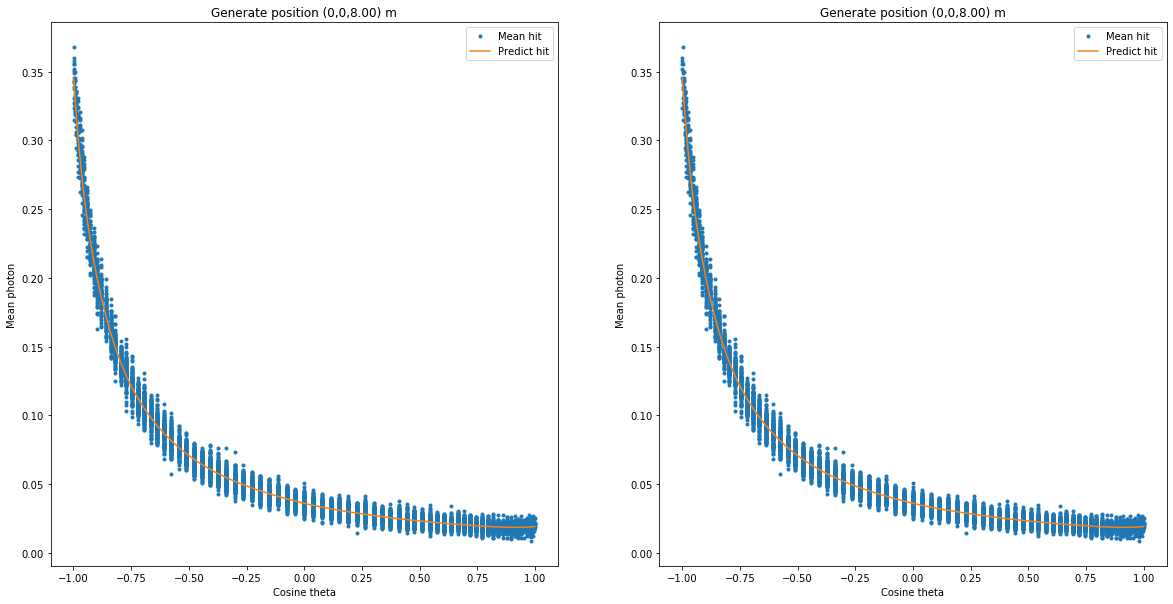

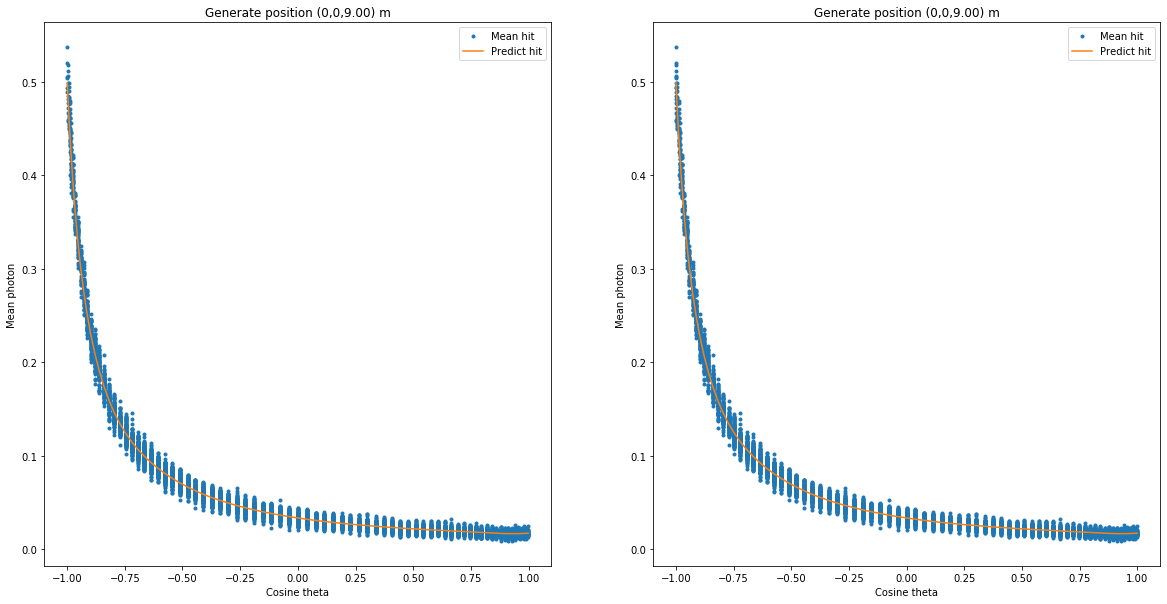

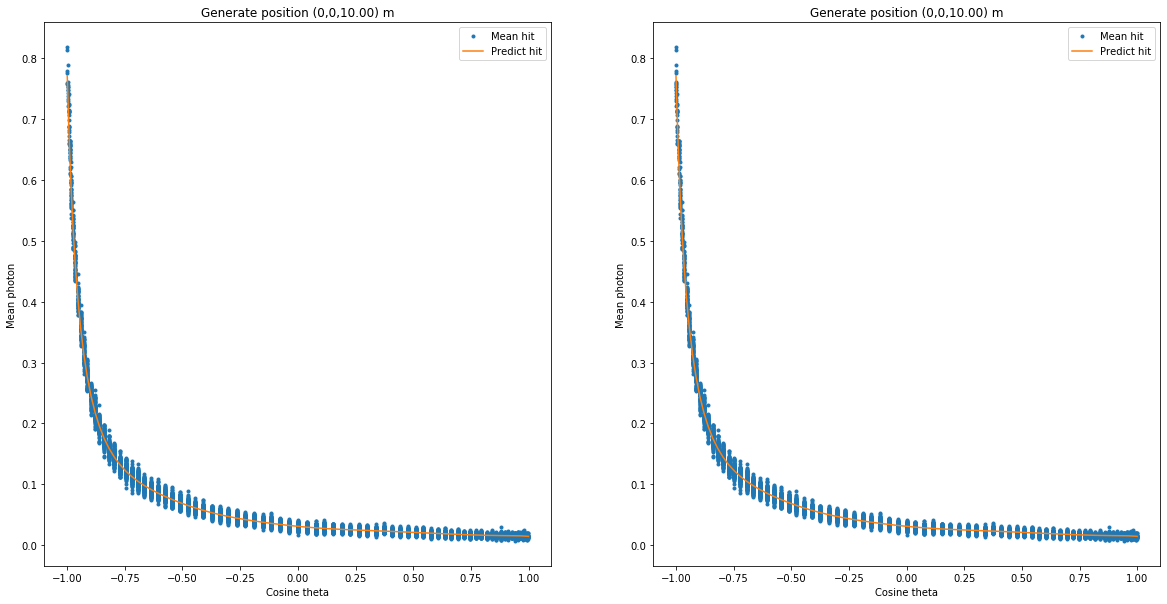

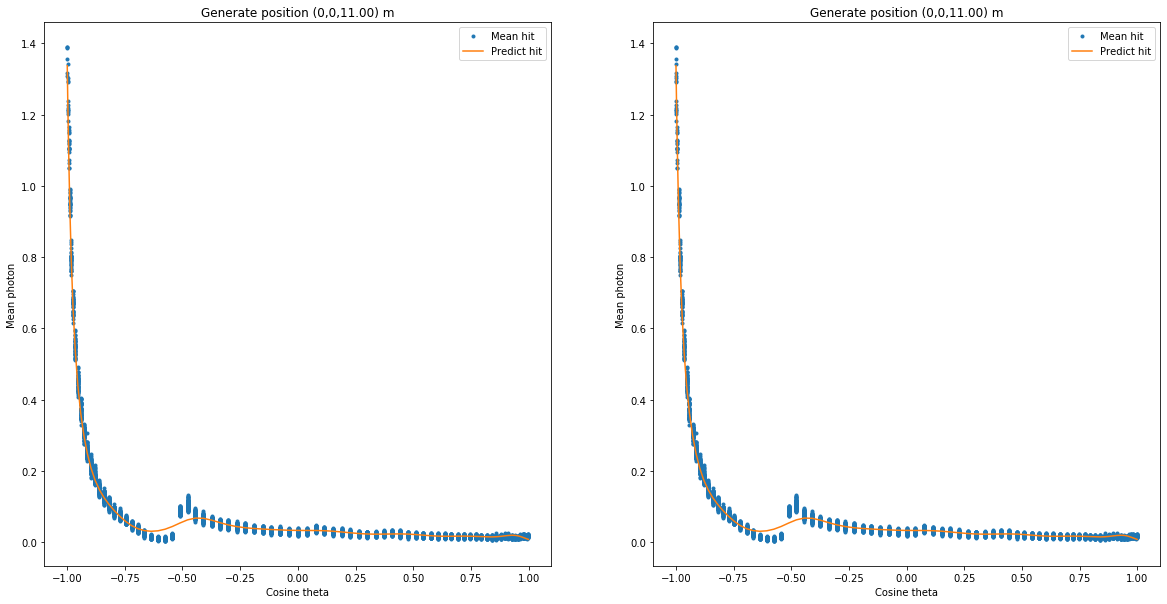

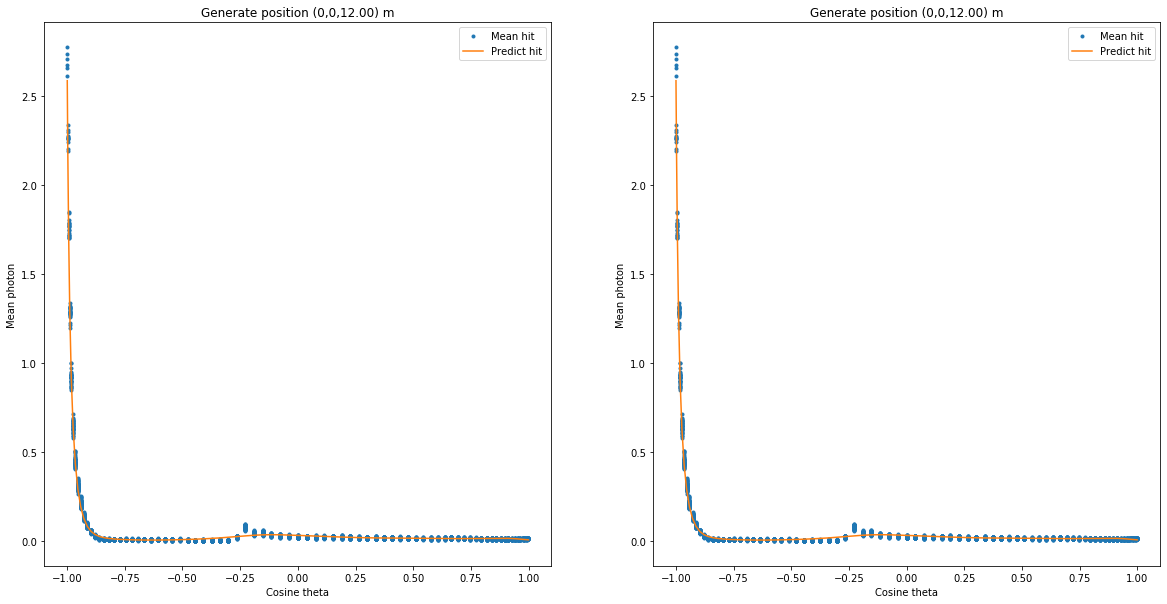

In [92]:
# view fit pe goodness
def findfile(radius):
    filename = '../coeff_pe_5kt_sparse_21/5kt_' + radius + '.h5'
    #print(filename)
    h = tables.open_file(filename,'r')
    coeff = np.array(h.root.coeff)[:]
    expect = np.array(h.root.mean)[:]
    predict = np.array(h.root.predict)[:]
    h.close()
    return coeff, expect, predict

coeff = [];
expect = [];
predict = [];

a1,a2,a3 = findfile('+0.00')
mean = np.exp(np.sum(np.log(np.array(a2)))/30)
x = np.array(a2)/mean
print(x,np.sum(np.log(x)))
x = 1

for i in np.arange(12.0001,-12,-0.2):
    file_str = '%+.2f' % i
    a1,a2,a3 = findfile(file_str)
    coeff.append(a1)
    expect.append(a2)
    predict.append(a3)

time_coeff = np.array(coeff)
radius = np.arange(12.0001,-12,-0.2)
plt.plot(radius, time_coeff)
plt.xlabel('Radius/m')
plt.ylabel('Coefficients')
plt.show()
def ReadPMT(geo):
    f = open(r'../PMT_' + geo + '.txt')
    line = f.readline()
    data_list = []
    while line:
        num = list(map(float,line.split()))
        data_list.append(num)
        line = f.readline()
    f.close()
    PMT_pos = np.array(data_list)
    PMT_pos = PMT_pos[:,1:4]
    return PMT_pos

PMT_pos = ReadPMT('5kt')
vertex = np.array([0,0,10])
cos_theta = np.sum(vertex*PMT_pos,axis=1)\
    /np.sqrt(np.sum(vertex**2)*np.sum(PMT_pos**2,axis=1))
predict = np.array(predict)
for i in np.arange(0,121,5):
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    plt.plot(cos_theta, expect[i],'.')
    index = np.argsort(cos_theta)
    plt.plot(cos_theta[index], predict[i,index])
    plt.xlabel('Cosine theta')
    plt.ylabel('Mean photon')
    plt.title('Generate position (0,0,%.2f) m' % (i*0.2-12))
    plt.legend(['Mean hit','Predict hit'])
    plt.subplot(1,2,2)
    plt.plot(cos_theta, expect[i]/x,'.')
    index = np.argsort(cos_theta)
    plt.plot(cos_theta[index], predict[i,index])
    plt.xlabel('Cosine theta')
    plt.ylabel('Mean photon')
    plt.title('Generate position (0,0,%.2f) m' % (i*0.2-12))
    plt.legend(['Mean hit','Predict hit'])    
    plt.show()

In [79]:
import os
import tables
path = '../coeff_pe_1t_1.5MeV/'
def findfile(path, radius):
    data = []
    filename = path + 'file_' + radius + '.h5'
    h = tables.open_file(filename,'r')
    for i in np.arange(5,15,5):
        coeff = 'coeff' + str(i)
        mean = 'mean' + str(i)
        predict = 'predict' +str(i)
        rate = 'rate' + str(i)
        hinv = 'hinv' + str(i)
        chi = 'chi' + str(i)
        a = eval('h.root.'+ coeff + '[:]')
        b = eval('h.root.'+ mean + '[:]')
        c = eval('h.root.'+ predict + '[:]')
        d = eval('h.root.'+ rate + '[:]')
        e = eval('h.root.'+ hinv + '[:]')
        f = eval('h.root.'+ chi + '[:]')
        data.append((a,b,c,d,e,f))
    return x,y

k = findfile(path,'+0.01')
k[0]

../coeff_pe_1t_1.5MeV/file_+0.01.h5 (File) ''
Last modif.: 'Mon Apr 20 09:33:41 2020'
Object Tree: 
/ (RootGroup) ''
/chi10 (Array(30,)) ''
/chi5 (Array(30,)) ''
/coeff10 (Array(10,)) ''
/coeff5 (Array(5,)) ''
/hinv10 (Array(10, 10)) ''
/hinv5 (Array(5, 5)) ''
/mean10 (Array(30,)) ''
/mean5 (Array(30,)) ''
/predict10 (Array(30, 1)) ''
/predict5 (Array(30, 1)) ''
/rate10 (Array()) ''
/rate5 (Array()) ''



NoSuchNodeError: group ``/`` does not have a child named ``rate``

In [64]:
coeff = 'coeff' + str(i+1)
print(coeff)
#eval('x=h.root.'+ coeff + '[:]')
x=h.root.coeff5[:]

coeff5


NameError: name 'h' is not defined